In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import patient_id_age, heart_rate, create_index

# change to your folder path
os.chdir('C:/Users/xiao-zy19/Desktop/Johns Hopkins/Biomedical Data Design/EICU Database/eicu-collaborative-research-database-demo-2.0.1')
# os.chdir('/Users/xiao-zy19/Desktop/Johns Hopkins/Biomedical Data Design/EICU Database/eicu-collaborative-research-database-demo-2.0.1') 

# get patient id
patient_id, patient_age, patient_offset = patient_id_age()
# extract heart rate data
HR, _ = heart_rate(patient_id, drop_neg=True)

Loading Heart Rate Data...
Heart Rate Data Loaded. Time: 2.51s


In [2]:
print(f'Heartrate data shape: {HR.shape}')
# print(f'HR_index shape: {HR_index.shape}')
print(patient_offset)

Heartrate data shape: (814892, 3)
      patientunitstayid  unitdischargeoffset
2                143870                  793
13               151179                 4904
15               151900                 3460
16               152954                 4224
17               153972                 1545
...                 ...                  ...
2505            3346187                 2120
2509            3348292                10185
2511            3348409                 1895
2514            3351297                 1490
2517            3352231                 1369

[915 rows x 2 columns]


In [3]:
patient_hours = patient_offset.copy().reset_index(drop=True)
patient_hours['unitdischargeoffset'] = np.floor(patient_hours['unitdischargeoffset']/60).astype(int)
print(patient_hours)

     patientunitstayid  unitdischargeoffset
0               143870                   13
1               151179                   81
2               151900                   57
3               152954                   70
4               153972                   25
..                 ...                  ...
910            3346187                   35
911            3348292                  169
912            3348409                   31
913            3351297                   24
914            3352231                   22

[915 rows x 2 columns]


In [4]:
unique_HR_patient_ids = HR['patientunitstayid'].unique()
patient_hours = patient_hours[patient_hours['patientunitstayid'].isin(unique_HR_patient_ids)].reset_index(drop=True)
print(patient_hours)
print(patient_hours.loc[patient_hours["patientunitstayid"]==186393])

     patientunitstayid  unitdischargeoffset
0               143870                   13
1               151179                   81
2               151900                   57
3               152954                   70
4               153972                   25
..                 ...                  ...
907            3346187                   35
908            3348292                  169
909            3348409                   31
910            3351297                   24
911            3352231                   22

[912 rows x 2 columns]
    patientunitstayid  unitdischargeoffset
17             186393                   97


In [5]:
HR_hour_buf = HR.copy().reset_index(drop=True)
HR_hour_buf["observationoffset"] = np.floor(HR_hour_buf["observationoffset"]/60).astype(int)
# print(HR_hour_buf.loc[HR_hour_buf["patientunitstayid"]==186393])
HR_hour_buf = HR_hour_buf.groupby(["patientunitstayid", "observationoffset"], as_index=False)["heartrate"].mean()
HR_hour_buf.sort_values(by=["patientunitstayid", "observationoffset"], inplace=True)
# print(HR_hour_buf.loc[HR_hour_buf["patientunitstayid"]==186393])

HR_hour_cleaned = pd.merge(HR_hour_buf, patient_hours,on='patientunitstayid', how='left')
# print(HR_hour_cleaned.loc[HR_hour_cleaned["patientunitstayid"]==186393])
HR_hour_cleaned = HR_hour_cleaned[HR_hour_cleaned['observationoffset'] <= HR_hour_cleaned['unitdischargeoffset']]
# print(HR_hour_cleaned.loc[HR_hour_cleaned["patientunitstayid"]==186393])
HR_hour = HR_hour_cleaned.drop(['unitdischargeoffset'], axis=1)
# print(HR_hour)
# print(HR_hour.loc[HR_hour["patientunitstayid"]==186393])

In [6]:
max_offset_per_patient = HR_hour.groupby('patientunitstayid')['observationoffset'].max().reset_index()
# print(max_offset_per_patient)

complete_ranges = []
for index, row in max_offset_per_patient.iterrows():
    patient_id = row['patientunitstayid']
    max_offset = row['observationoffset']
    complete_range = pd.DataFrame({
        'patientunitstayid': patient_id,
        'observationoffset': range(int(max_offset) + 1)
    })
    complete_ranges.append(complete_range)

complete_df = pd.concat(complete_ranges, ignore_index=True)
HR_full = pd.merge(complete_df, HR_hour, on=['patientunitstayid', 'observationoffset'], how='left')

HR_full_index = create_index(HR_full)
print(HR_full_index)

0          0
1         14
2         96
3        154
4        225
       ...  
908    64978
909    65148
910    65180
911    65205
912    65219
Length: 913, dtype: int64


Finish 6th patient


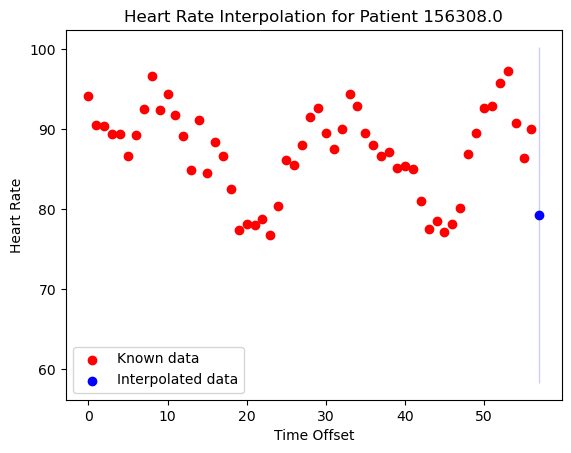

Finish 7th patient


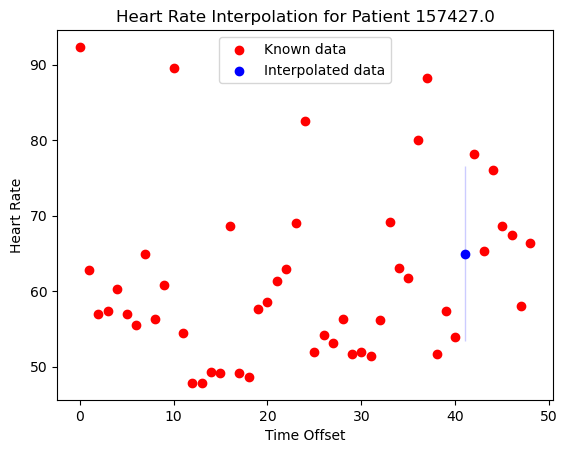

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 11th patient


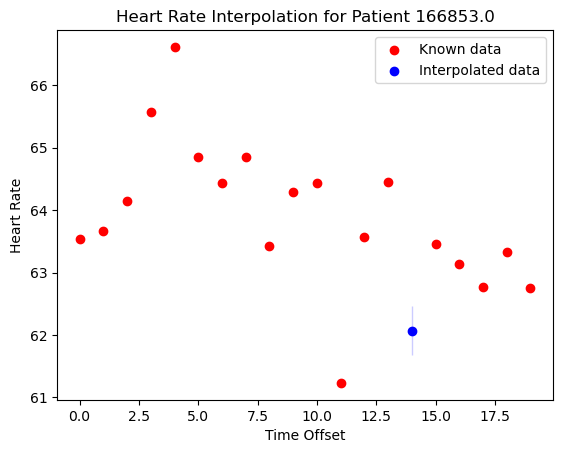

Finish 17th patient


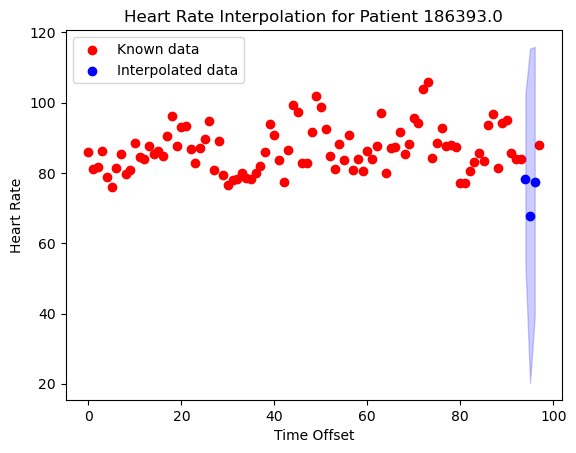

Finish 18th patient


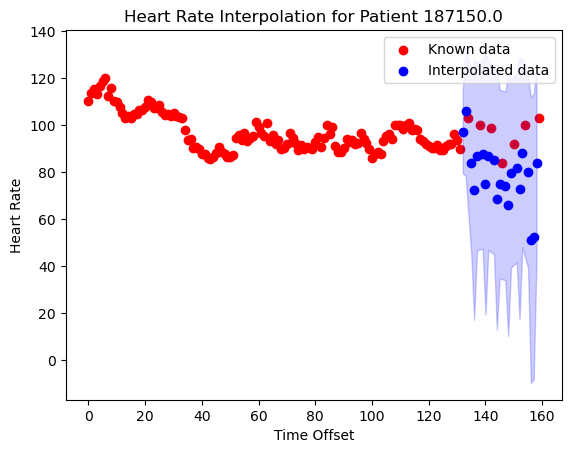

Finish 23th patient


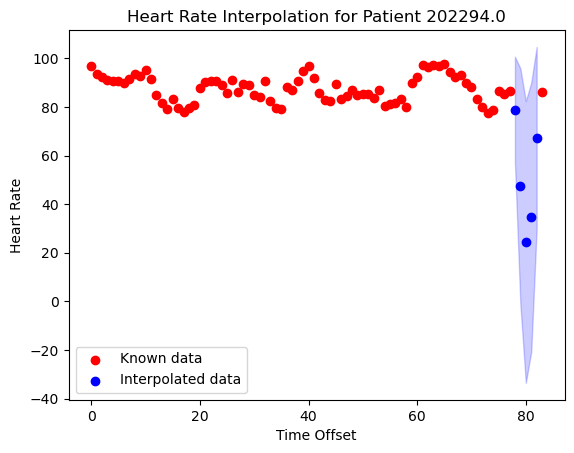

Finish 34th patient


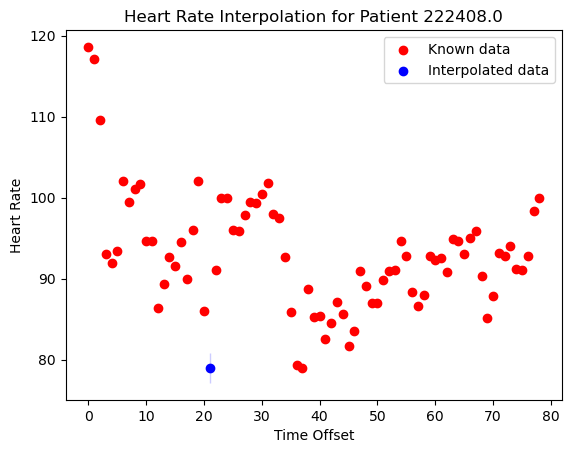

Finish 41th patient


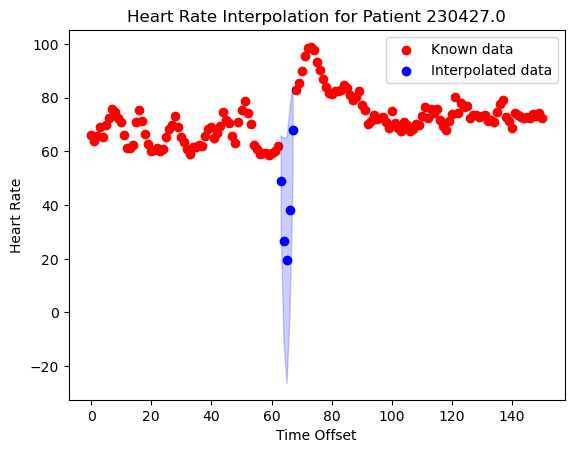

Finish 53th patient


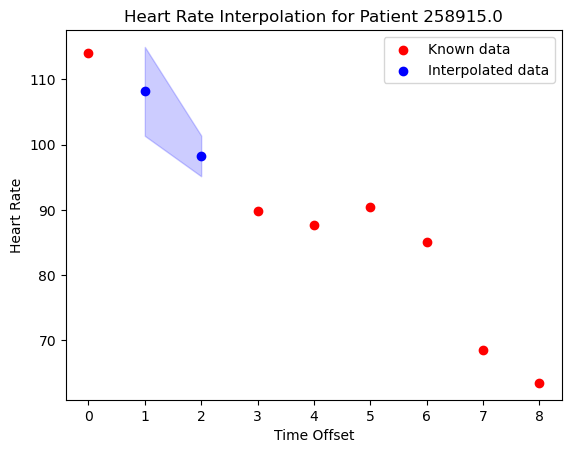

Finish 56th patient


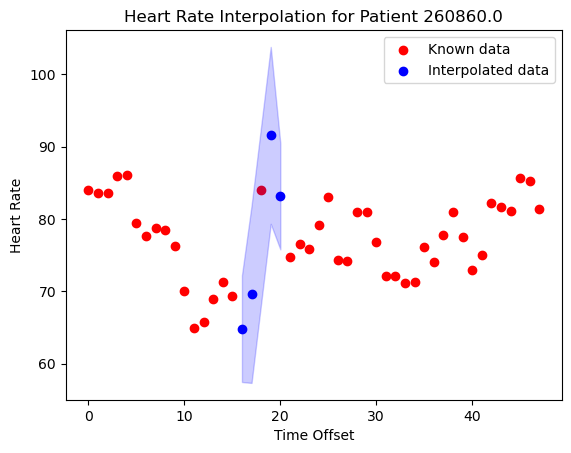

Finish 57th patient


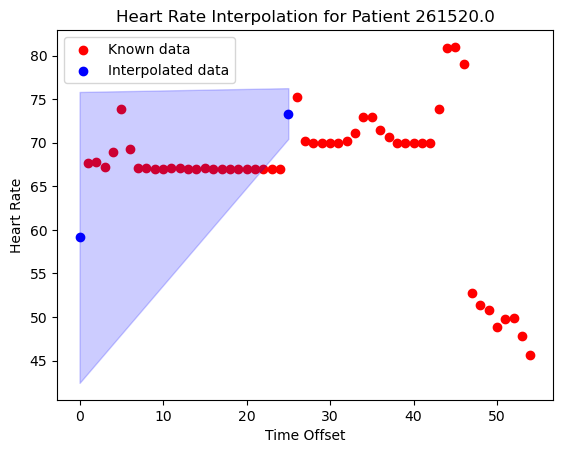

Finish 59th patient


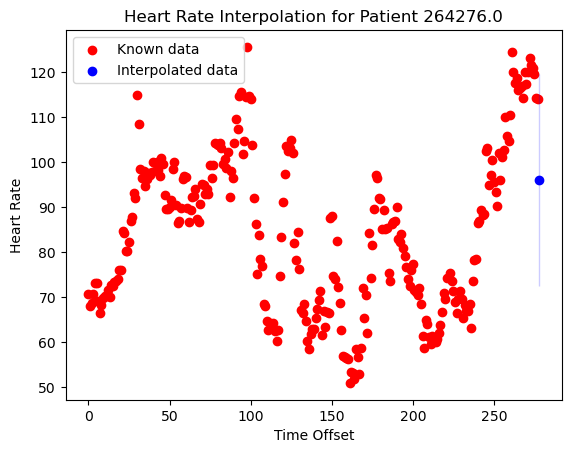

Finish 66th patient


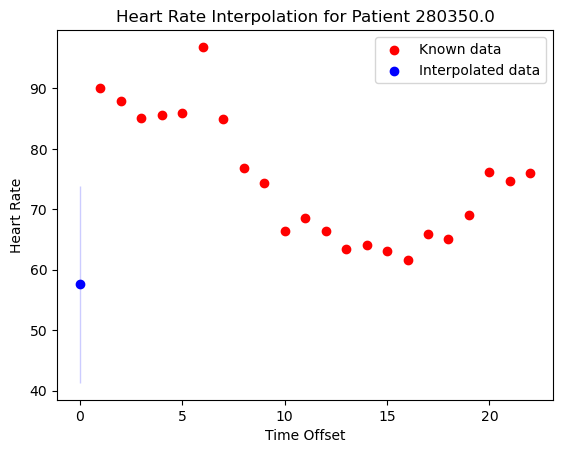

Finish 72th patient


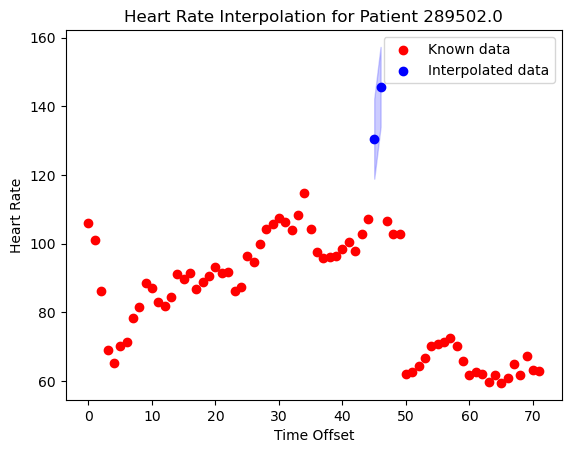

Finish 76th patient


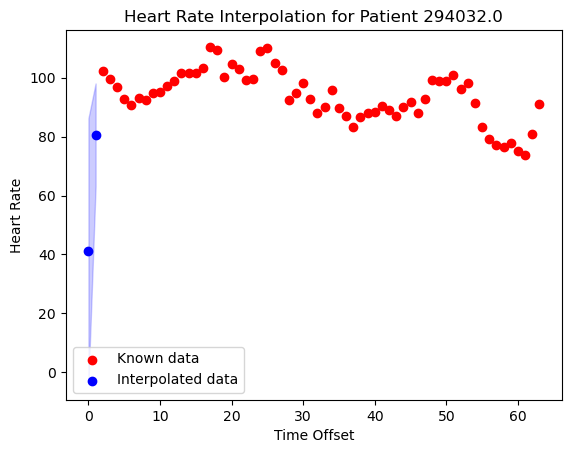

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 80th patient


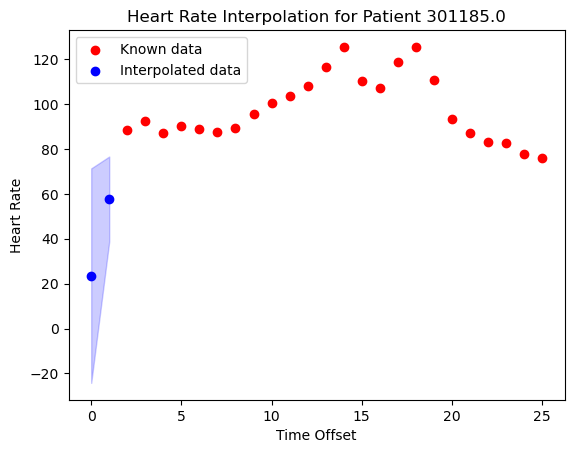

Finish 86th patient


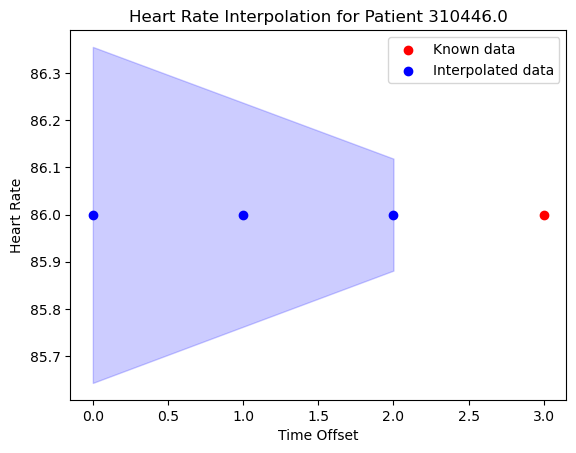

Finish 87th patient


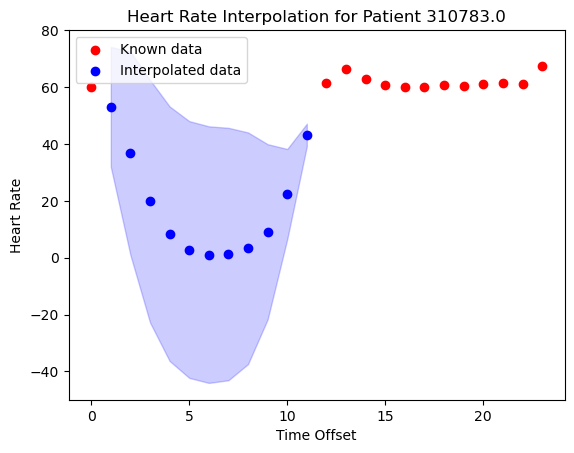

Finish 89th patient


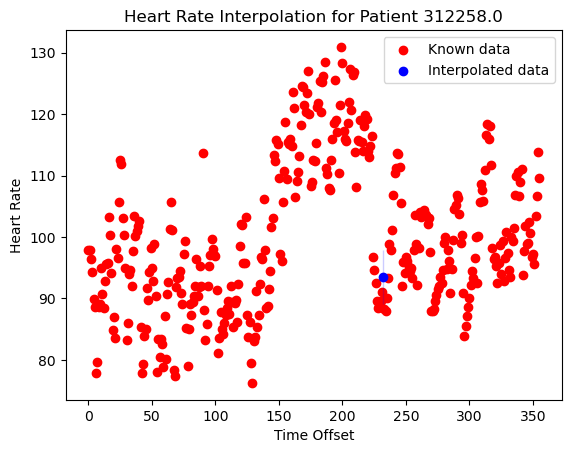

Finish 92th patient


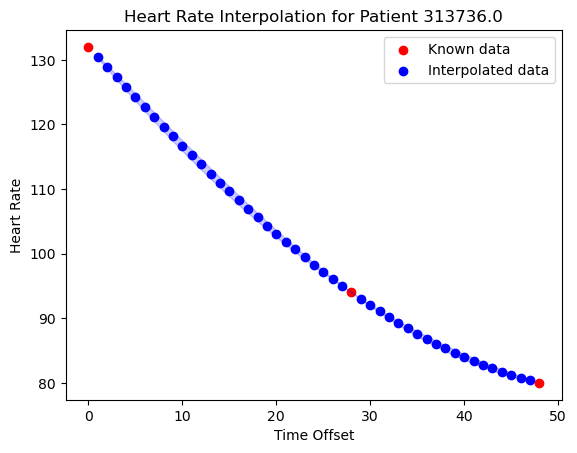

Finish 95th patient


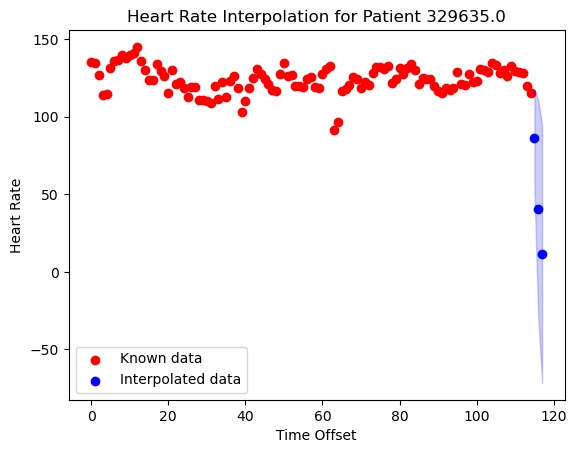

Finish 103th patient


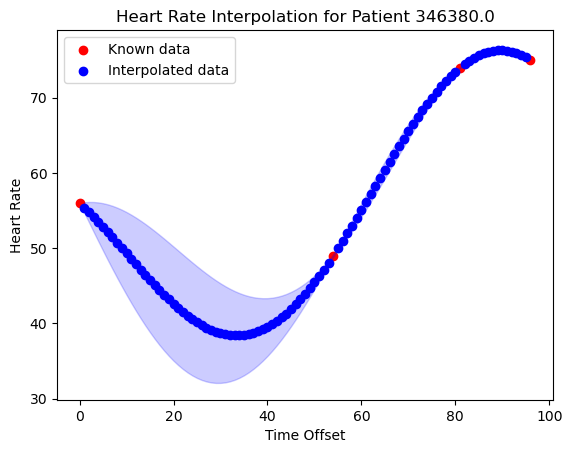

Finish 112th patient


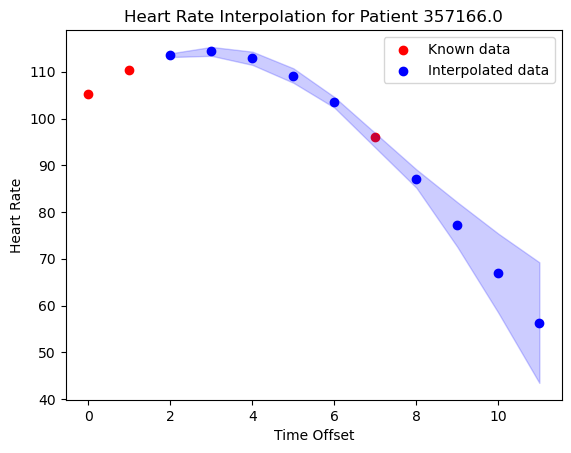

Finish 118th patient


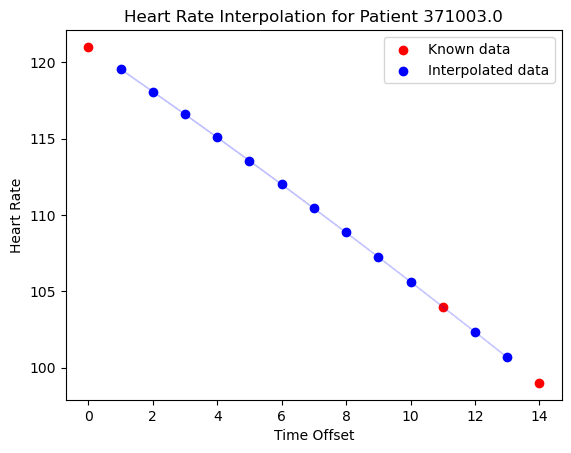

Finish 119th patient


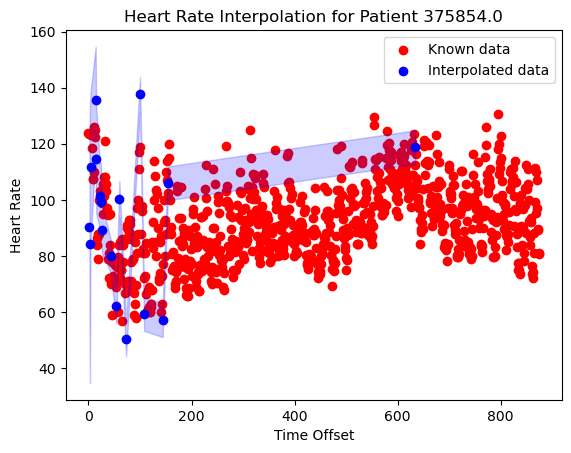

Finish 120th patient


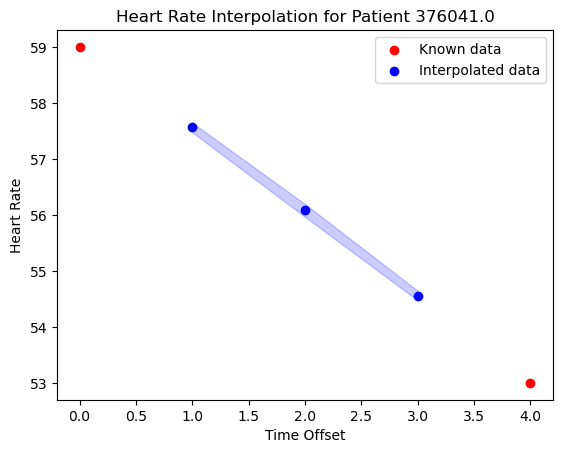

Finish 123th patient


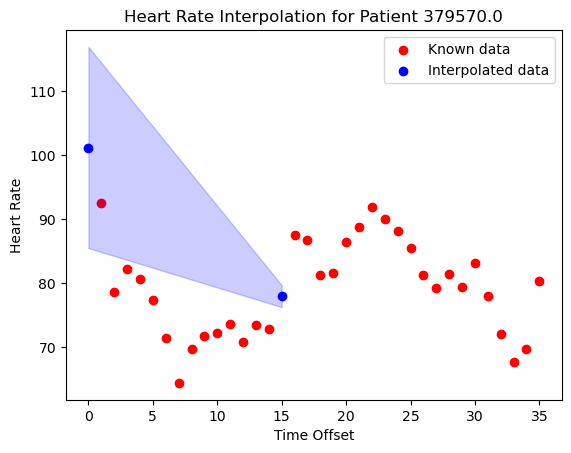

Finish 124th patient


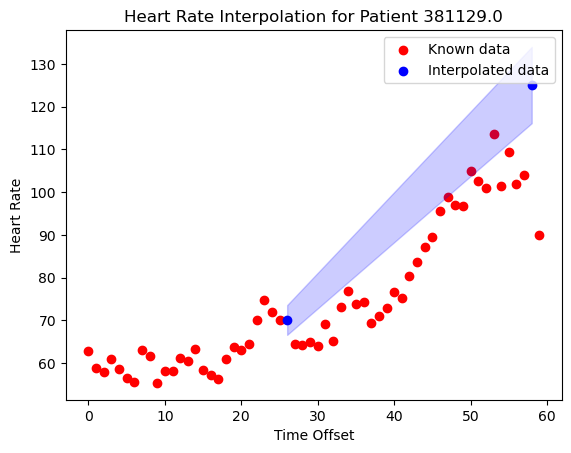

Finish 126th patient


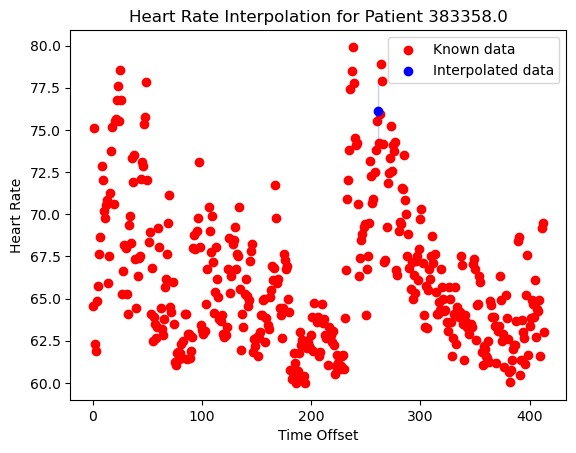

Finish 128th patient


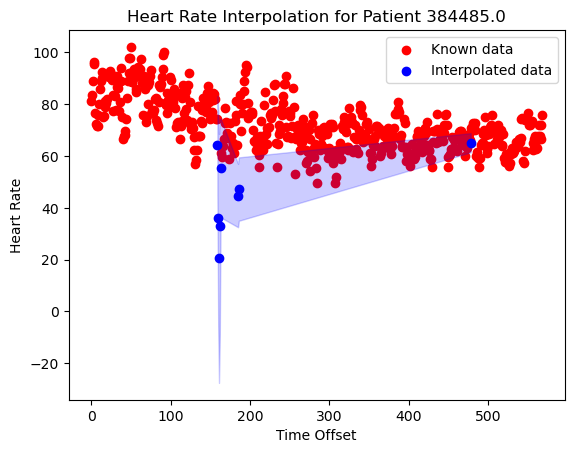

Finish 129th patient


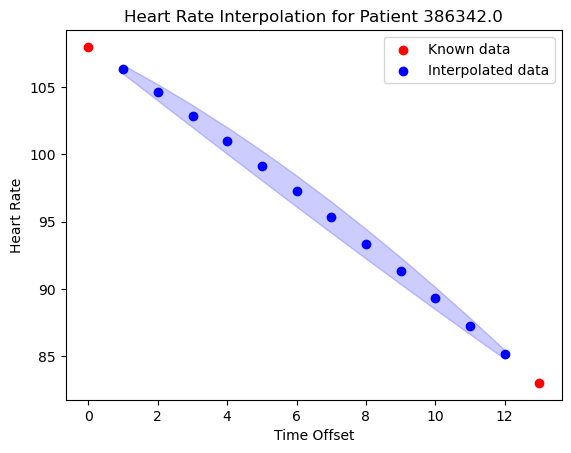

Finish 132th patient


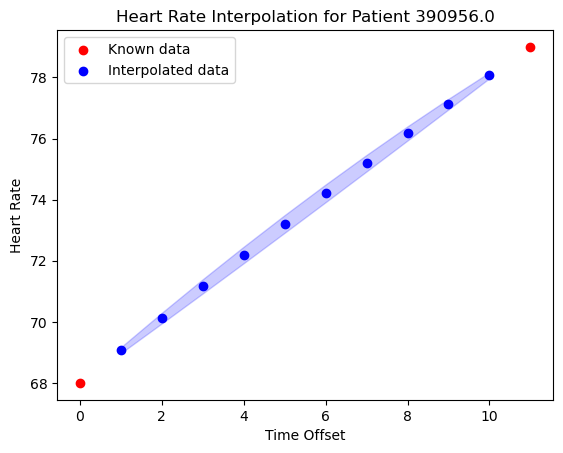

Finish 135th patient


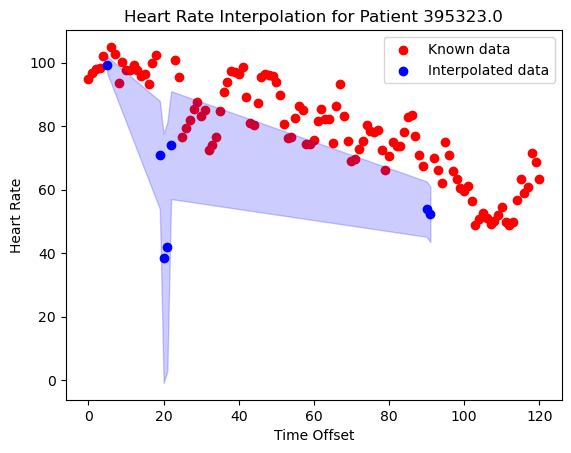

Finish 137th patient


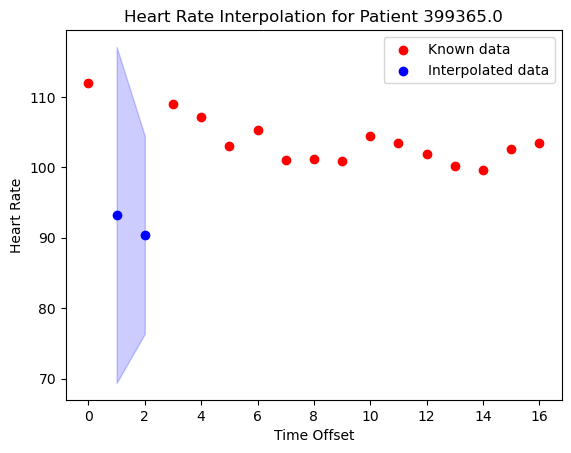

Finish 138th patient


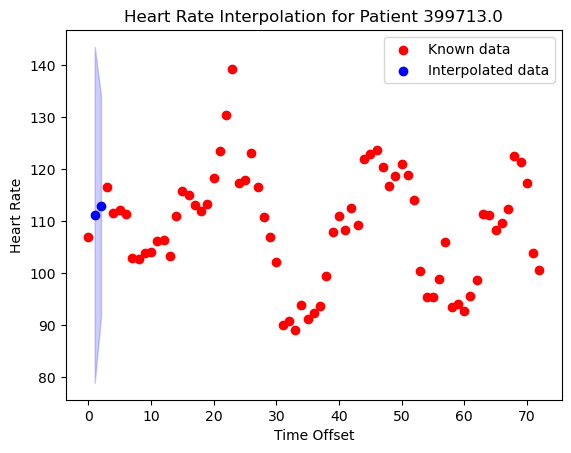

Finish 141th patient


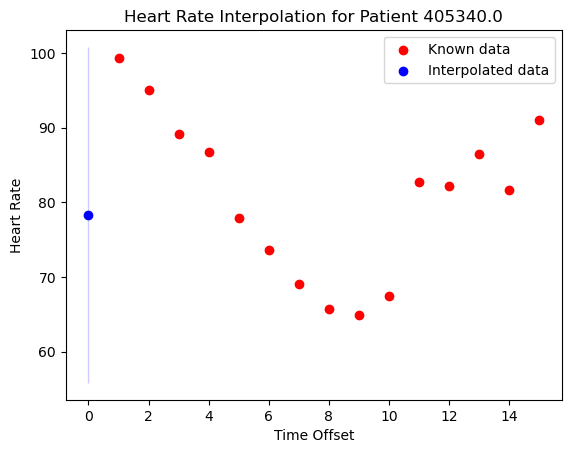

Finish 142th patient


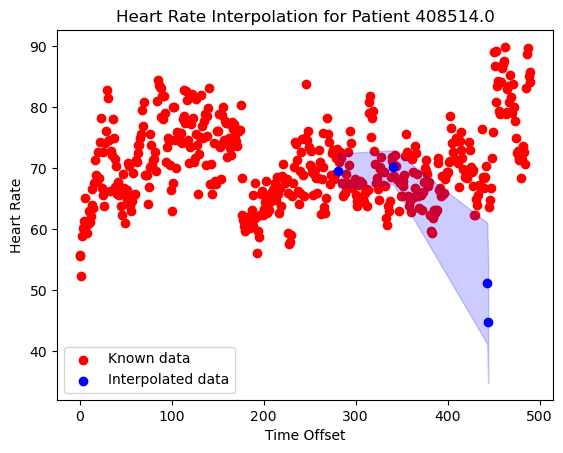

Finish 144th patient


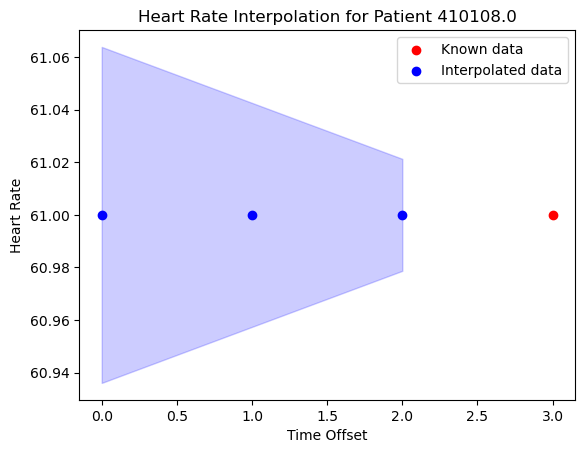

Finish 145th patient


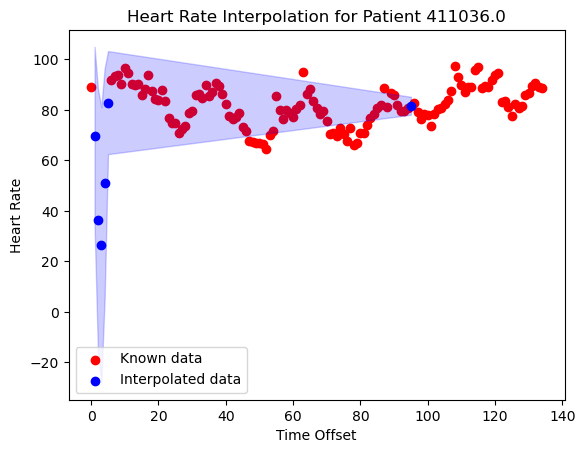

Finish 147th patient


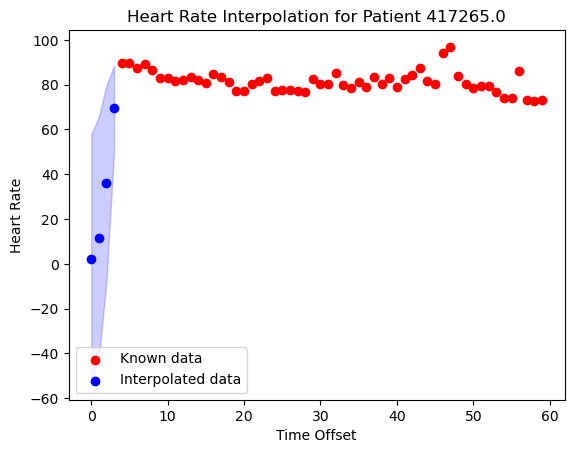

Finish 151th patient


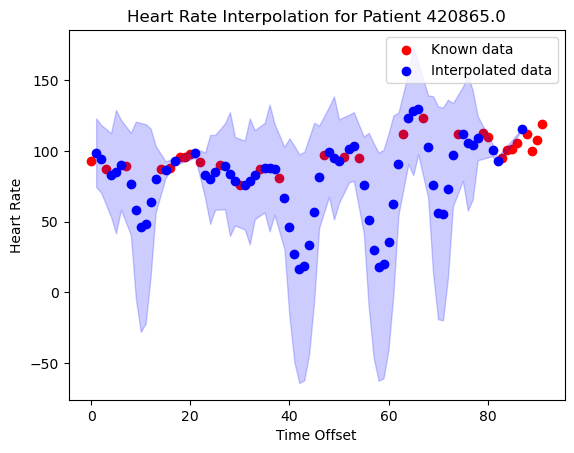

Finish 157th patient


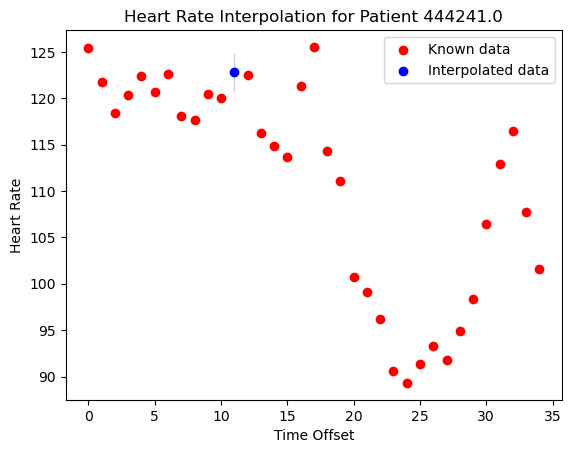

Finish 158th patient


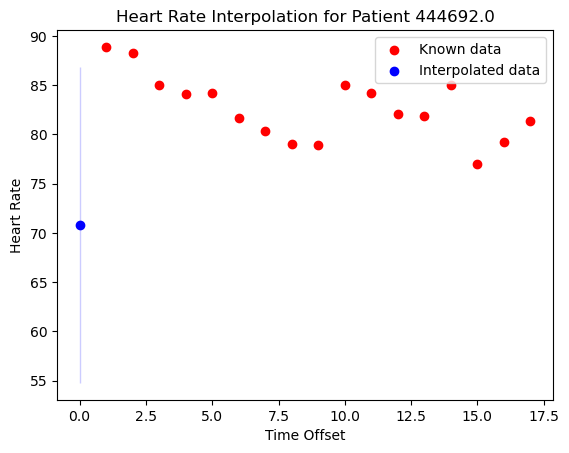

Finish 160th patient


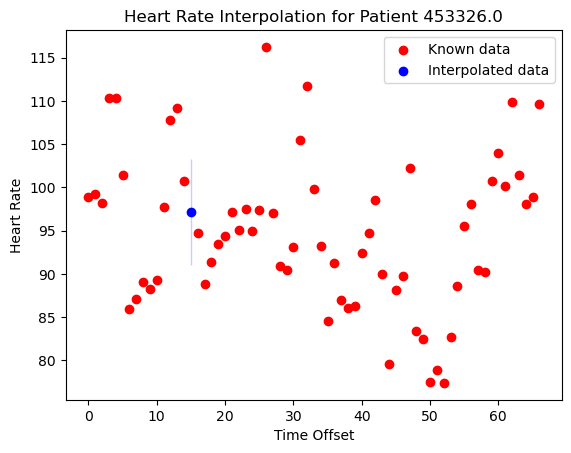

Finish 165th patient


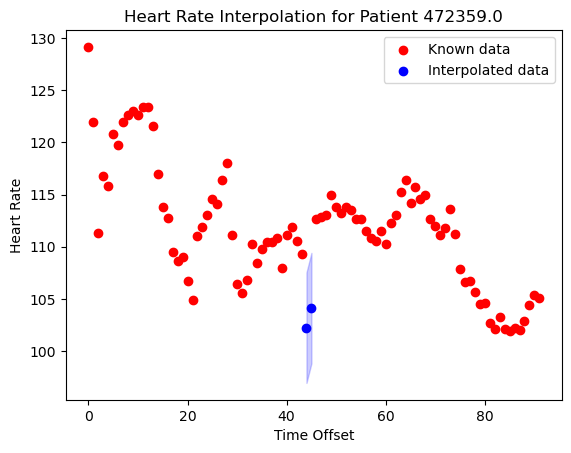

Finish 175th patient


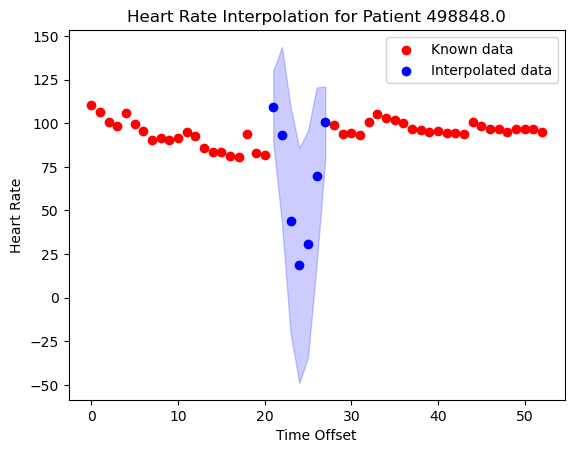

Finish 183th patient


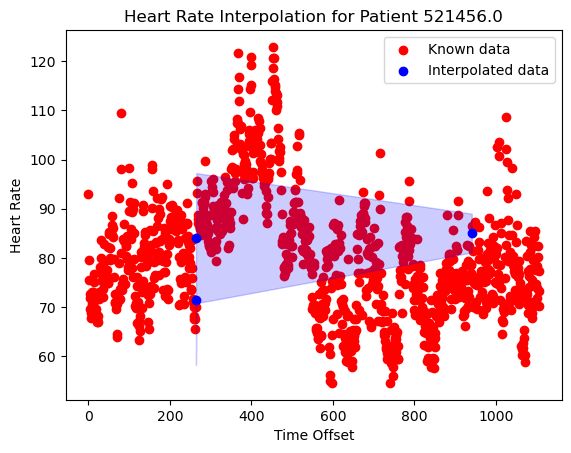

Finish 186th patient


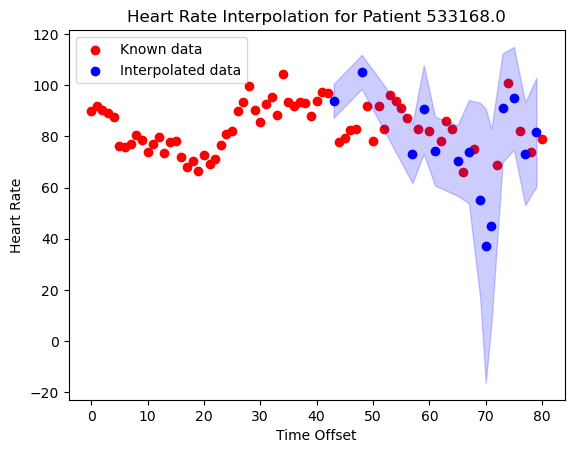

Finish 202th patient


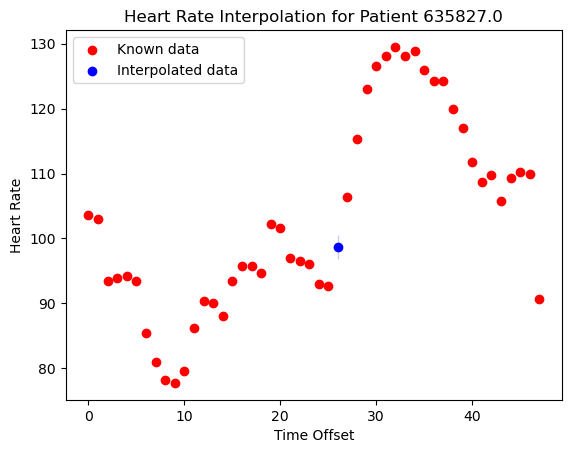

Finish 203th patient


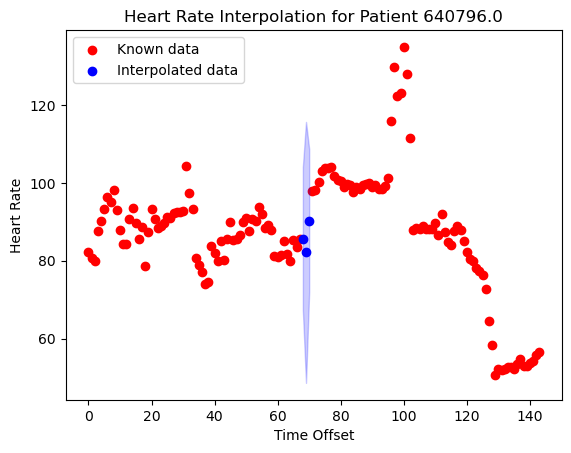

Finish 210th patient


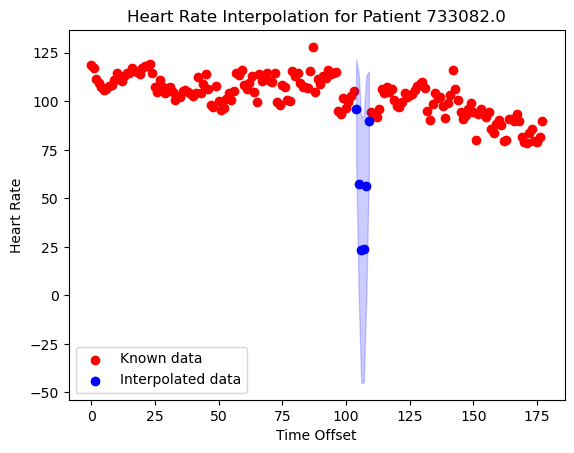

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 212th patient


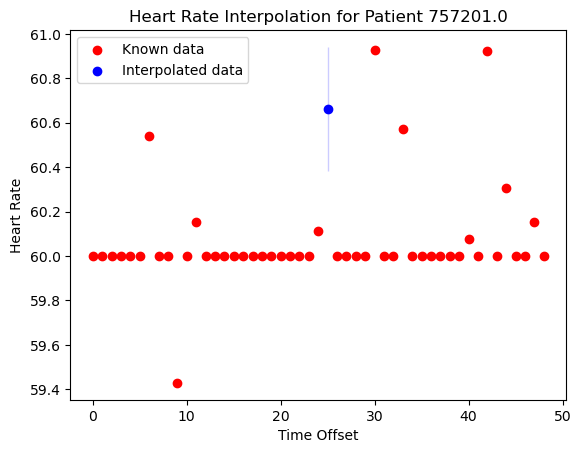

Finish 218th patient


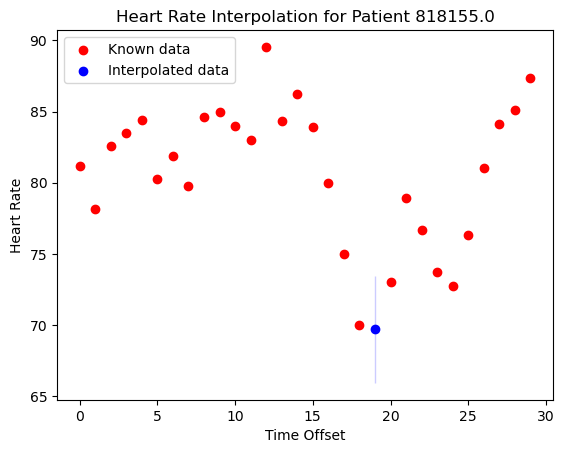

Finish 238th patient


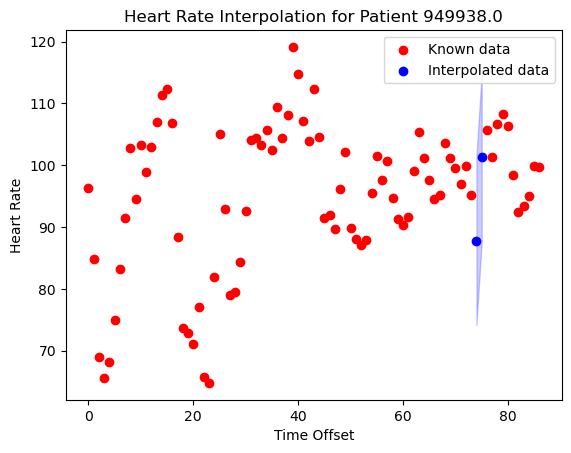

Finish 246th patient


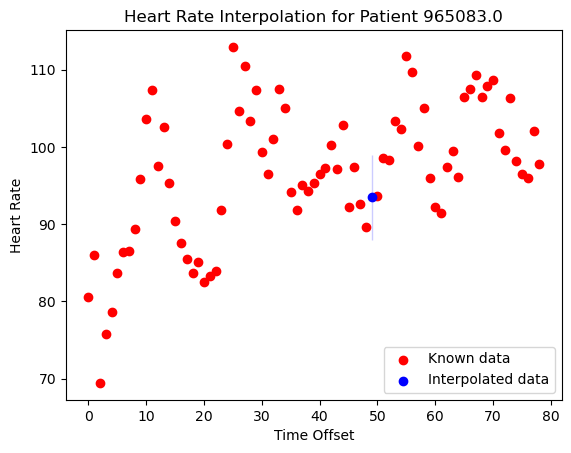

Finish 248th patient


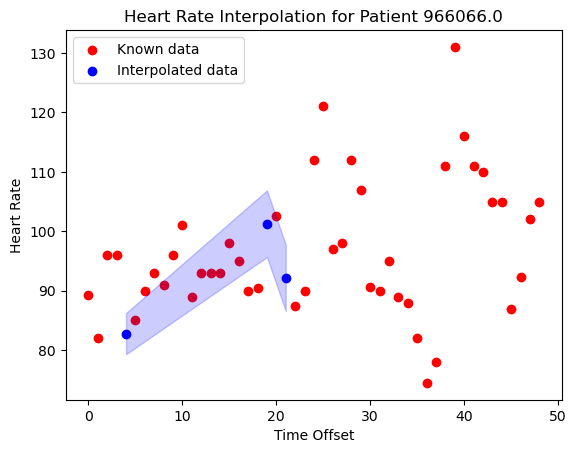

Finish 250th patient


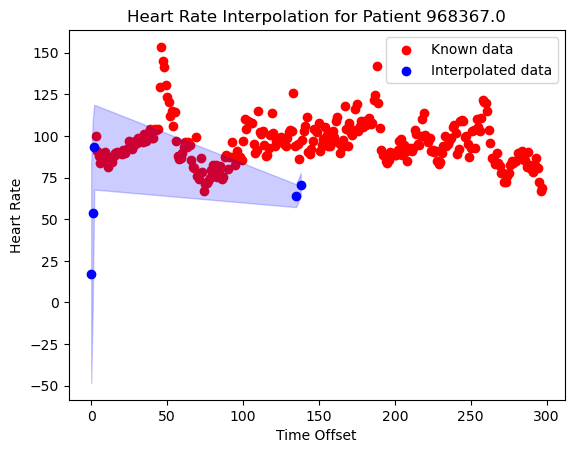

Finish 251th patient


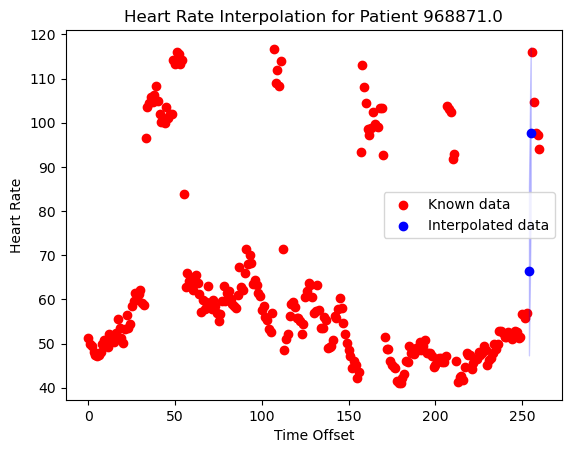

Finish 252th patient


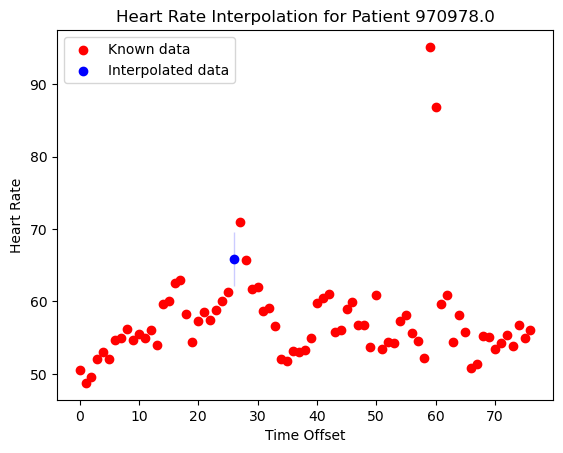

Finish 254th patient


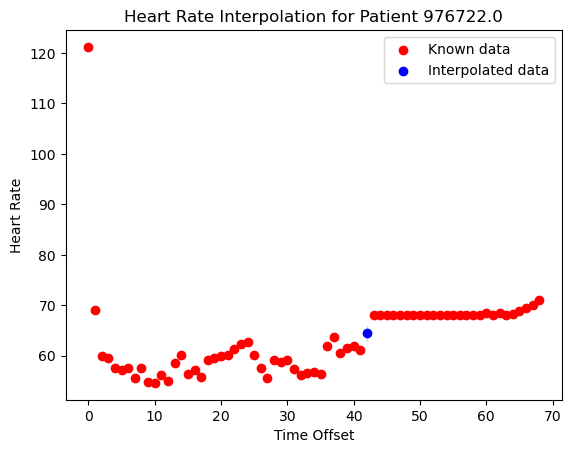

Finish 264th patient


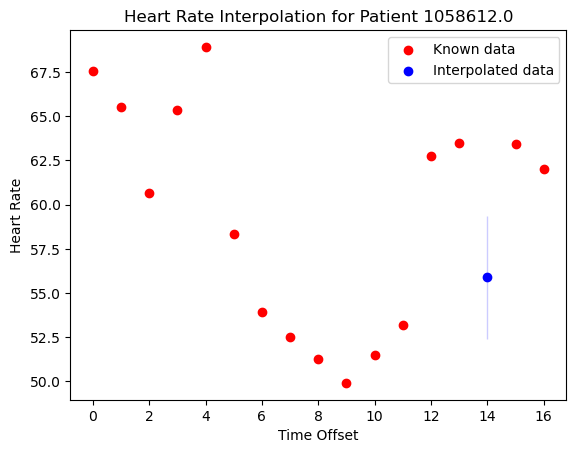

Finish 265th patient


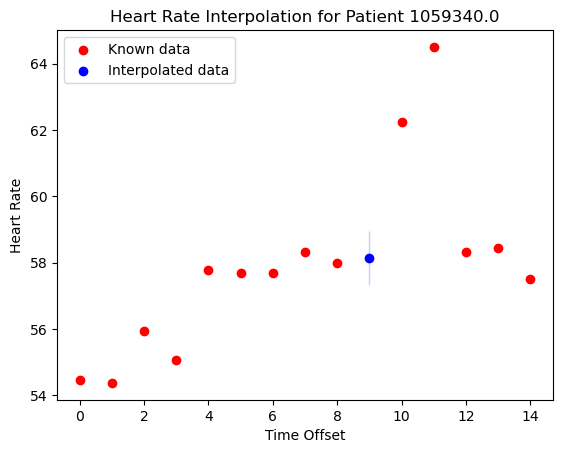

Finish 270th patient


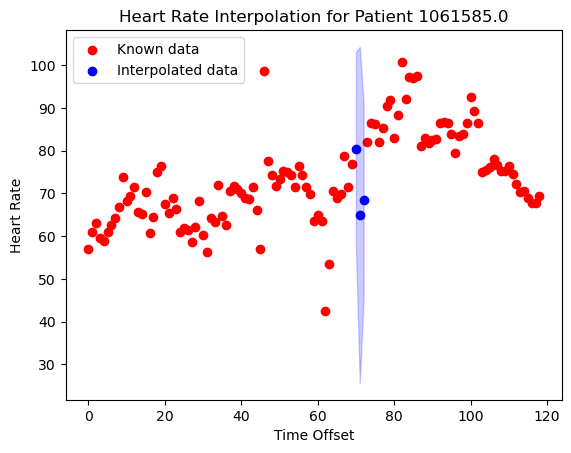

Finish 273th patient


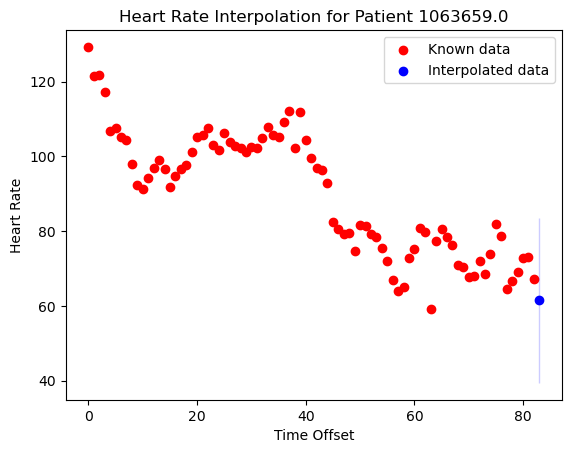

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 274th patient


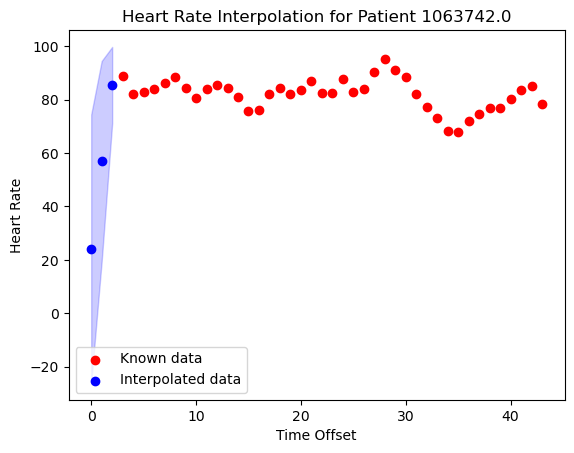

Finish 281th patient


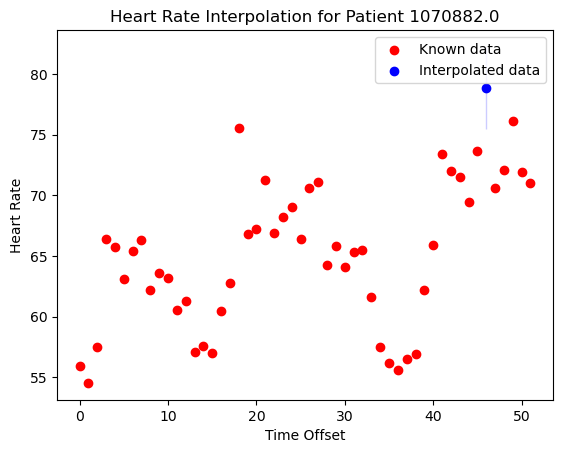

Finish 284th patient


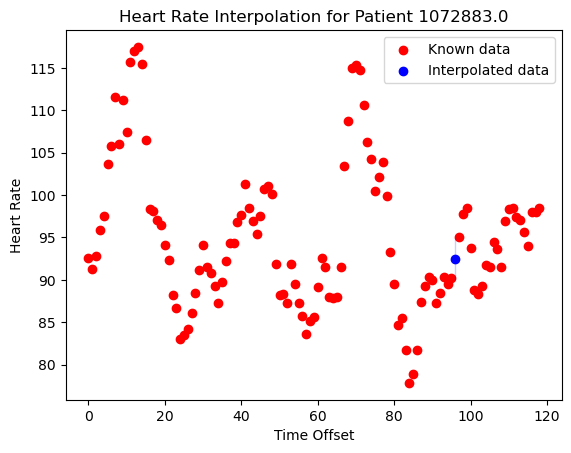

Finish 289th patient


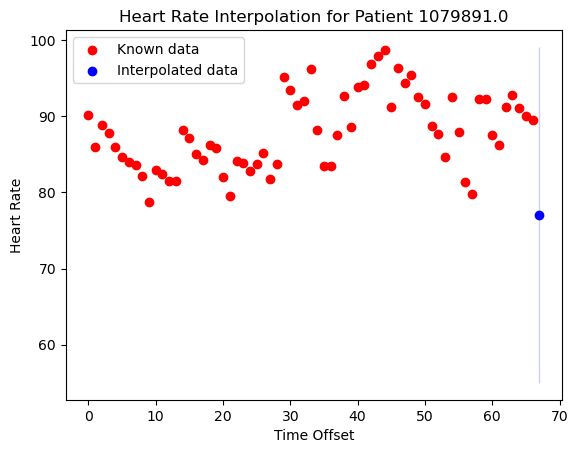

Finish 290th patient


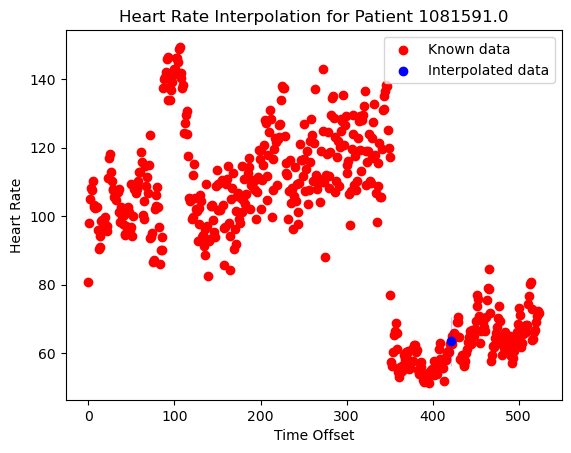

Finish 294th patient


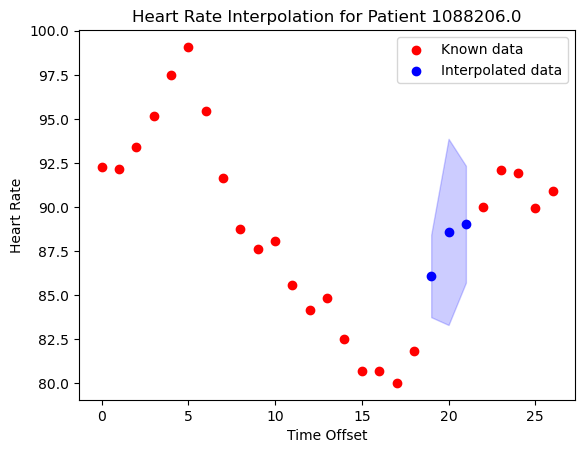

Finish 296th patient


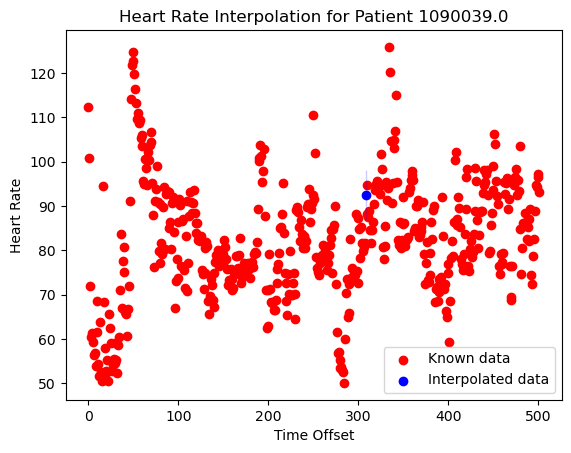

Finish 297th patient


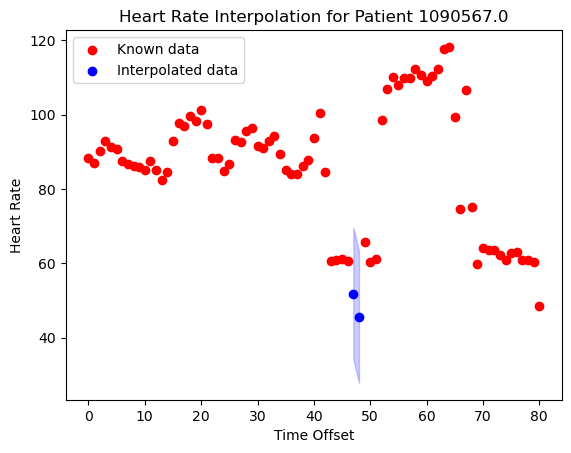

Finish 302th patient


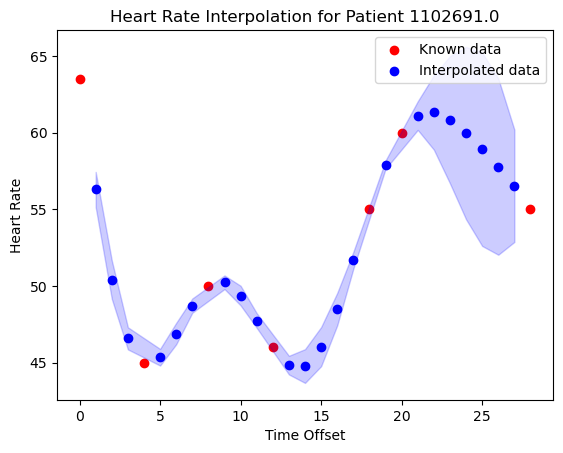

Finish 310th patient


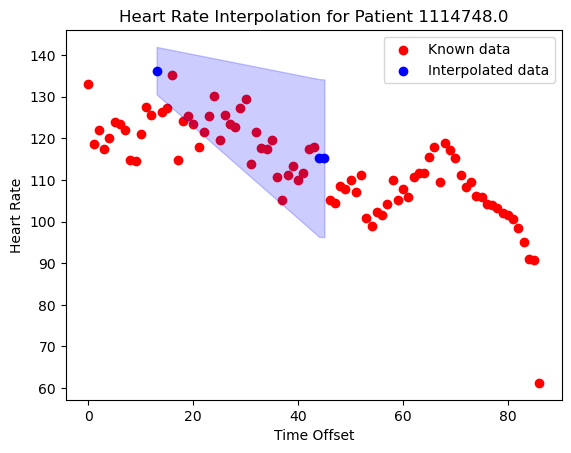

Finish 313th patient


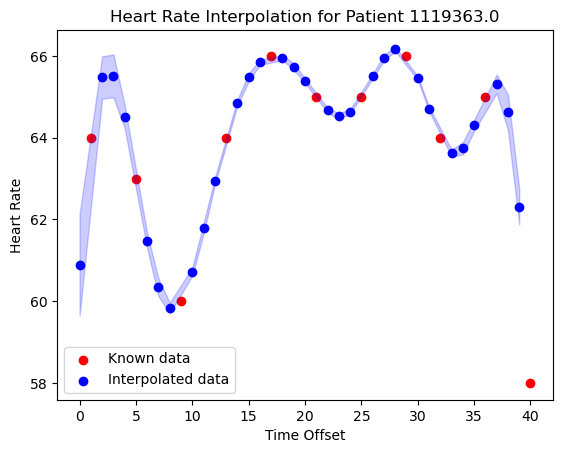

Finish 318th patient


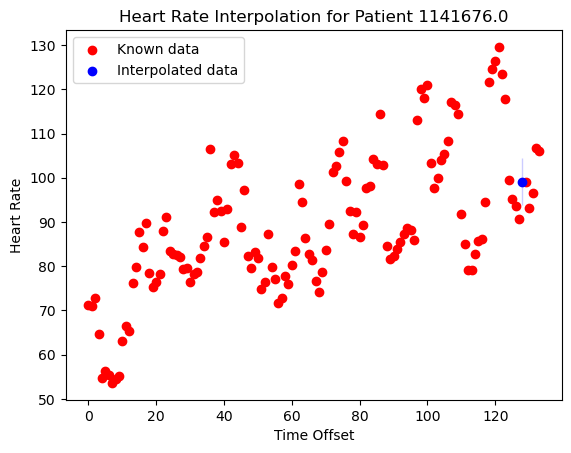

Finish 333th patient


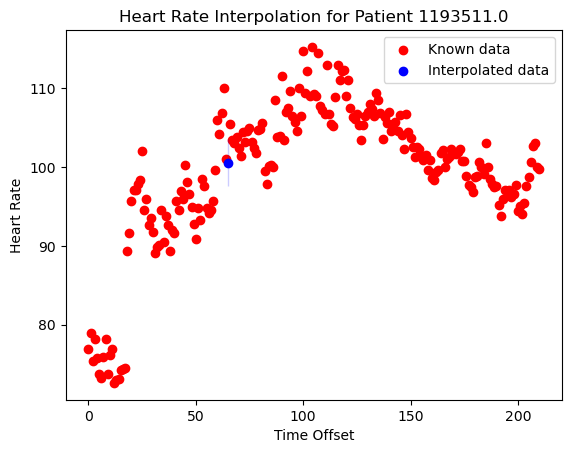

Finish 336th patient


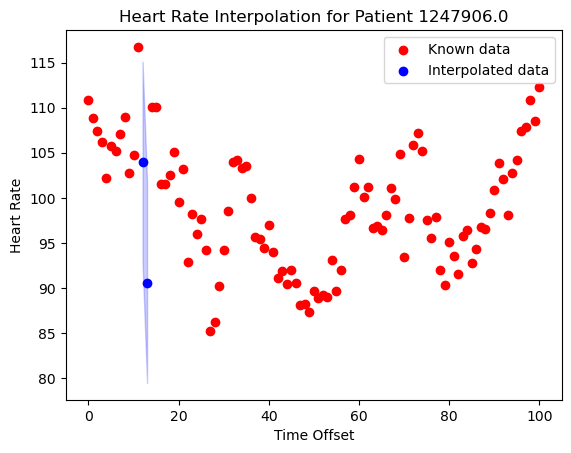

Finish 337th patient


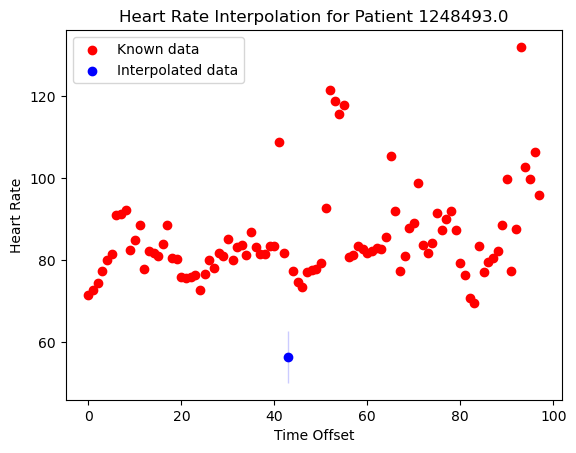

Finish 340th patient


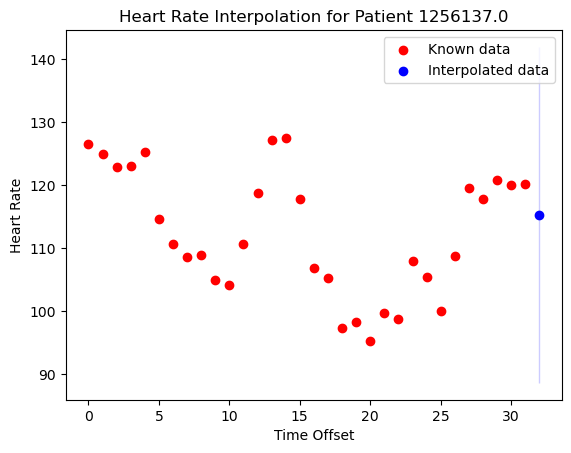

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 341th patient


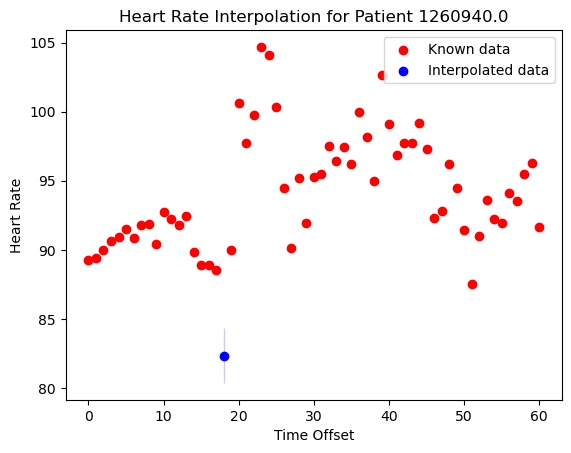

Finish 345th patient


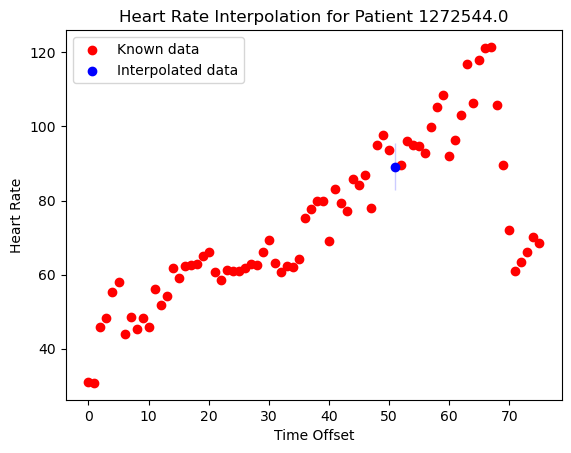

Finish 346th patient


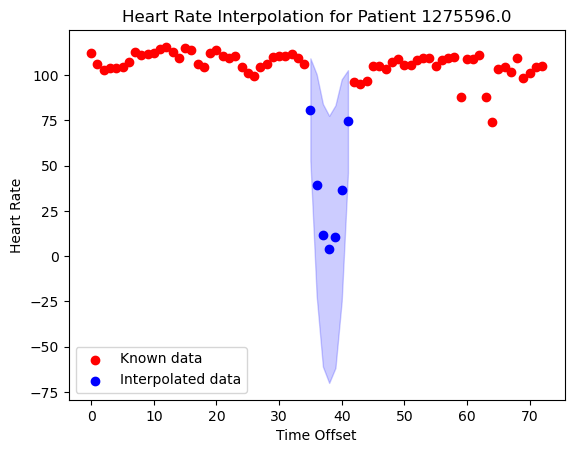

Finish 349th patient


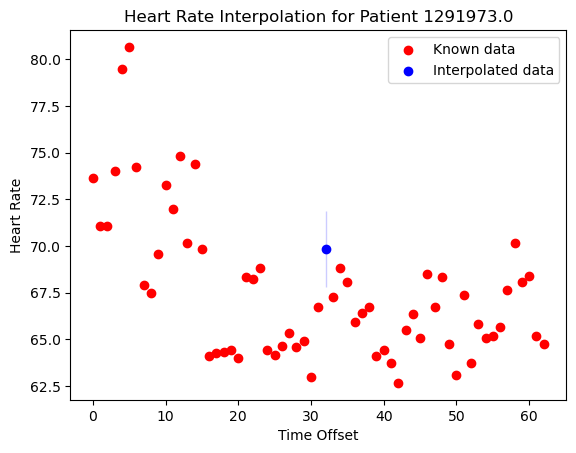

Finish 350th patient


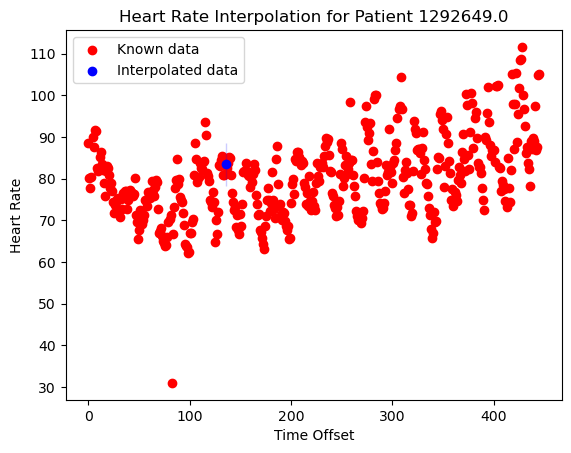

Finish 352th patient


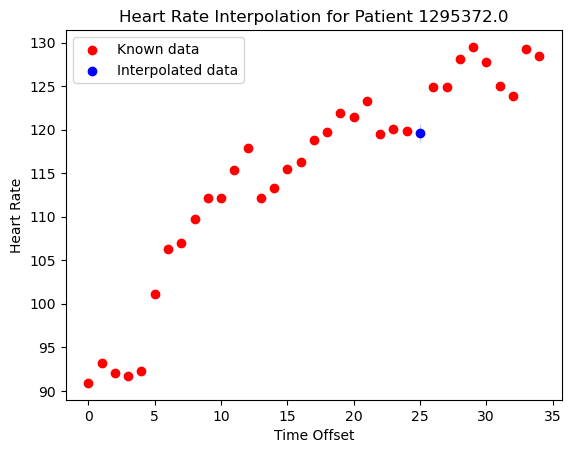

Finish 355th patient


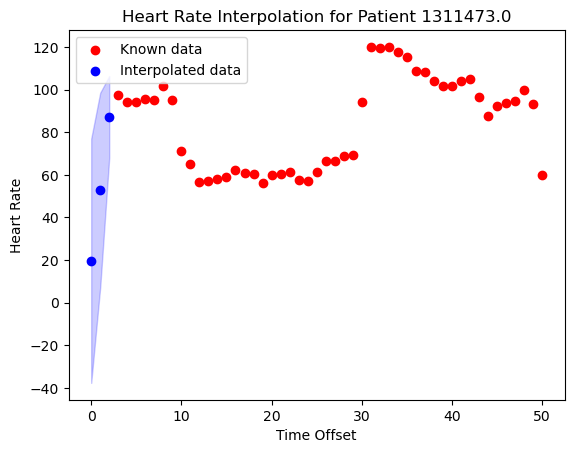

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 362th patient


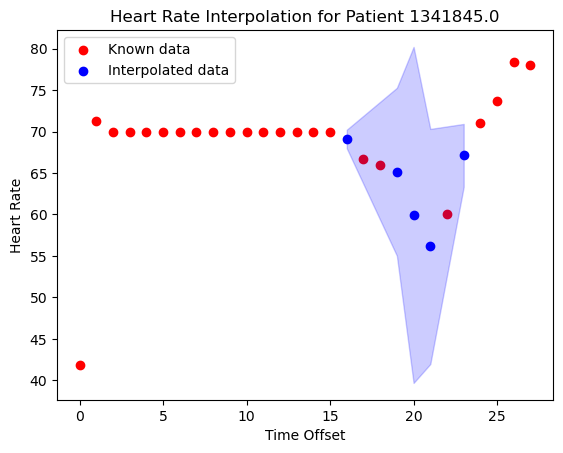

Finish 375th patient


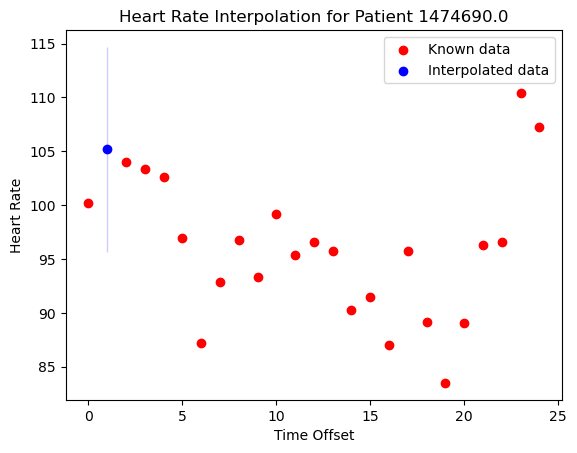

Finish 378th patient


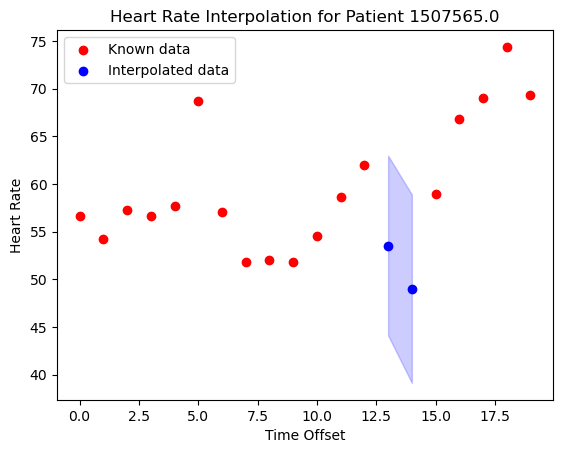

Finish 394th patient


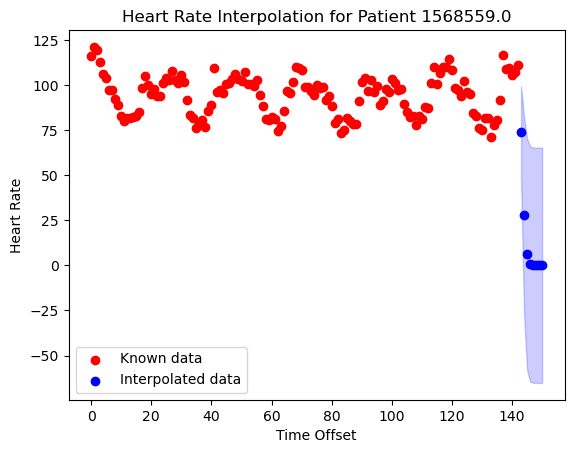

Finish 397th patient


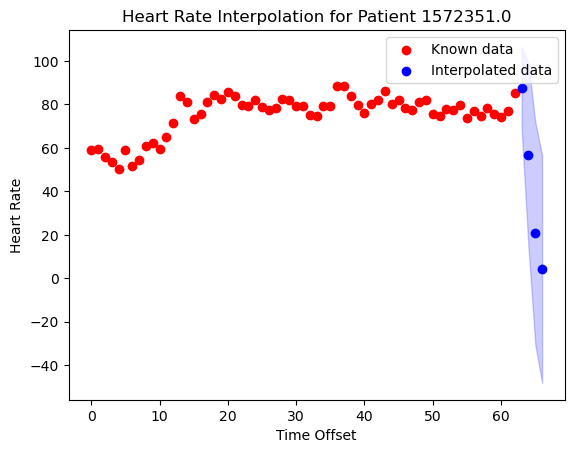

Finish 398th patient


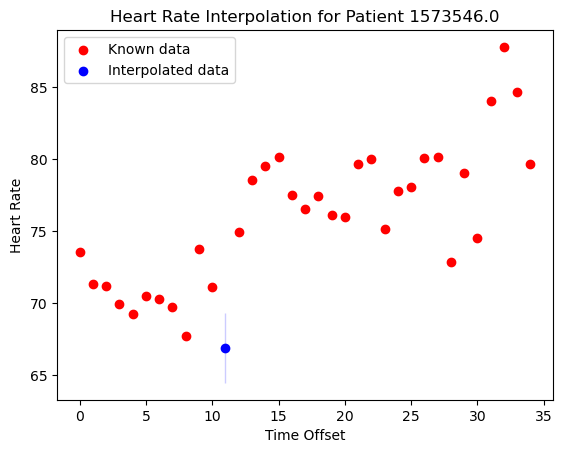

Finish 406th patient


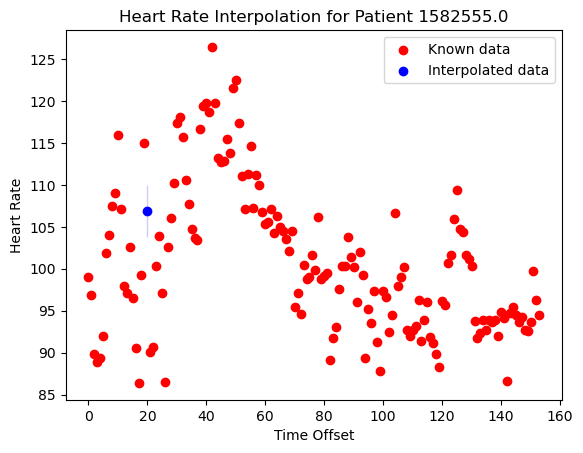

Finish 418th patient


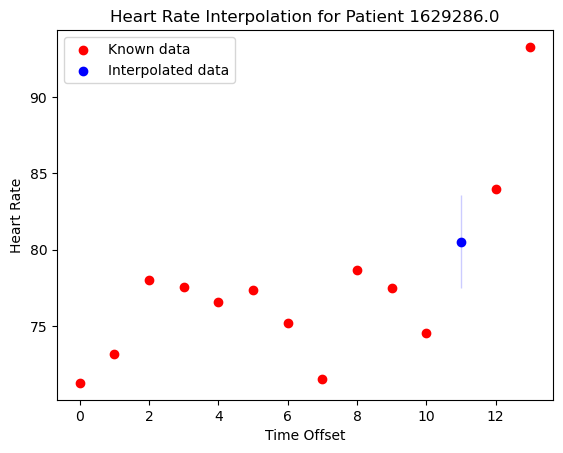

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 419th patient


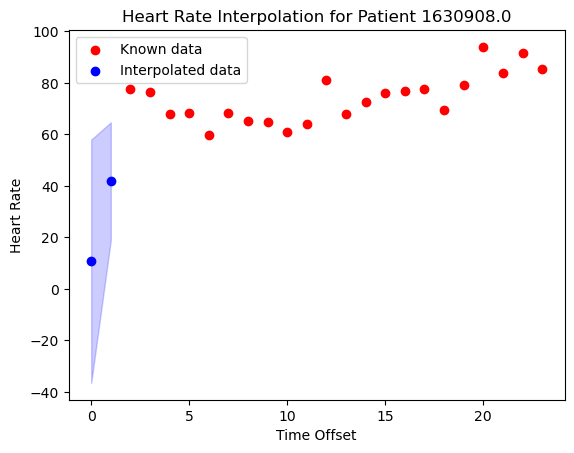

Finish 422th patient


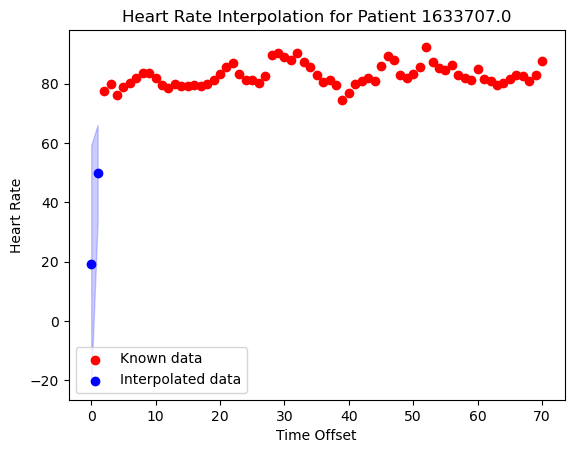

Finish 427th patient


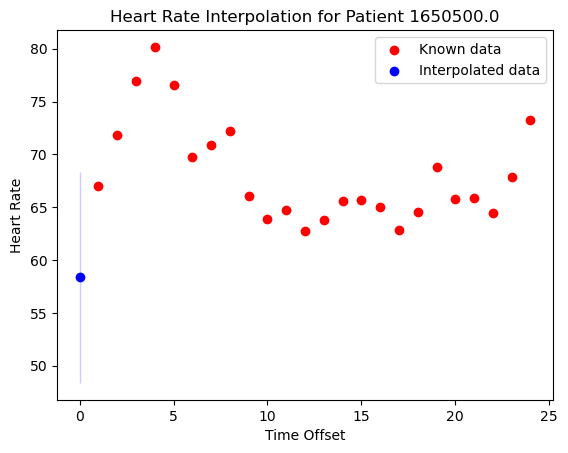

Finish 428th patient


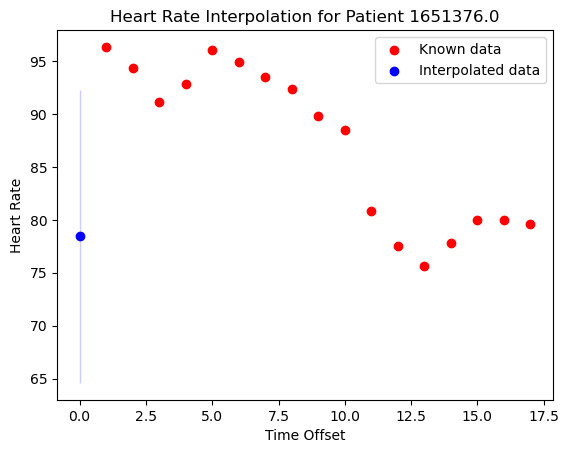

Finish 439th patient


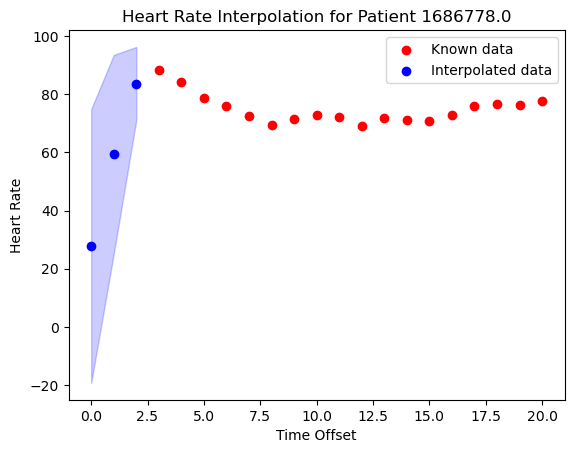

Finish 440th patient


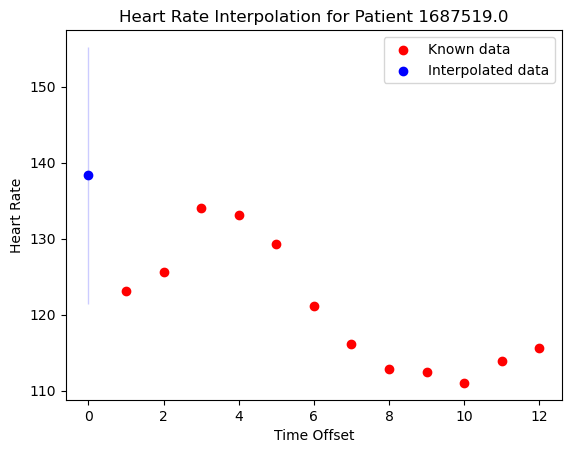

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 472th patient


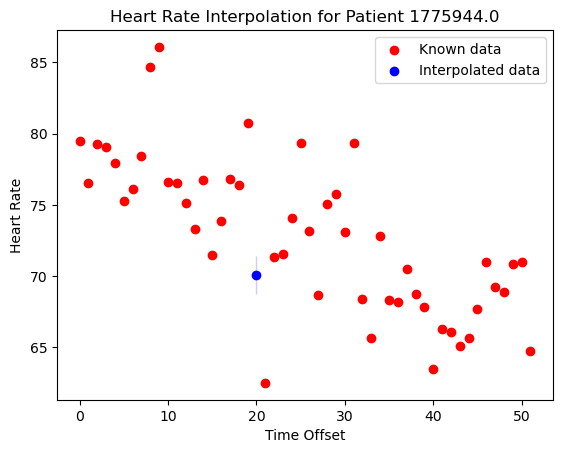

Finish 473th patient


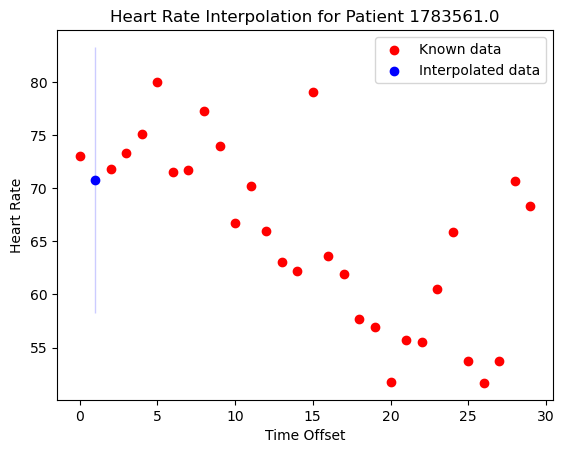

Finish 485th patient


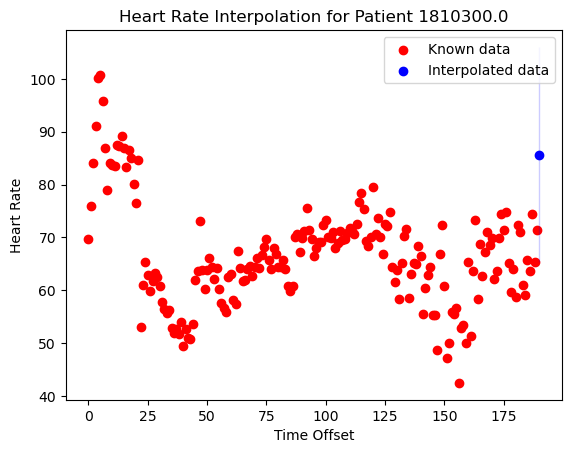

Finish 487th patient


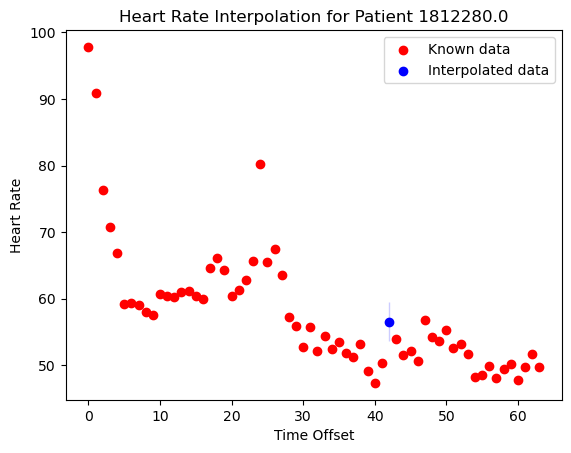

Finish 490th patient


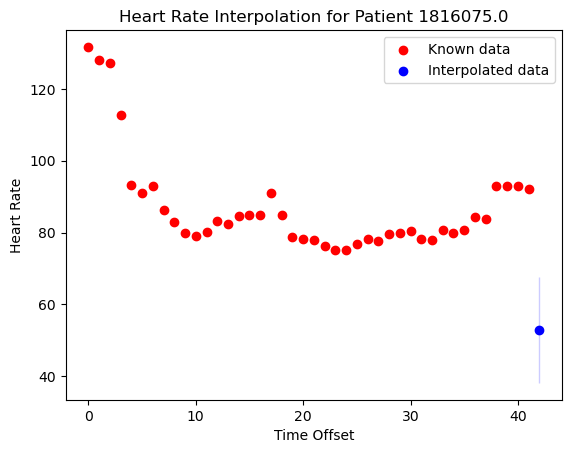

Finish 493th patient


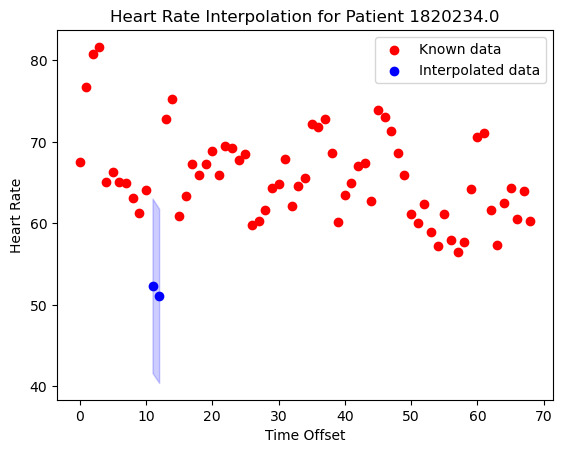

Finish 496th patient


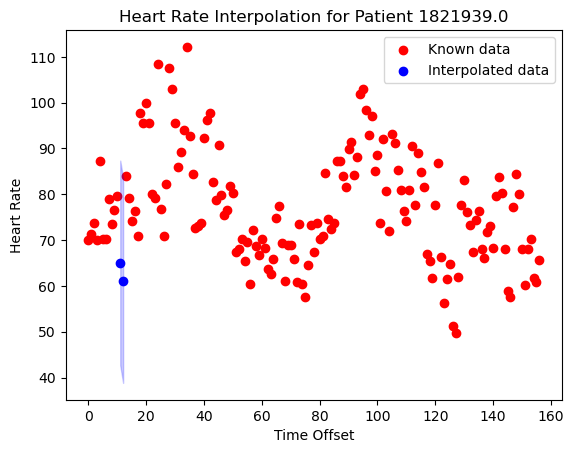

Finish 498th patient


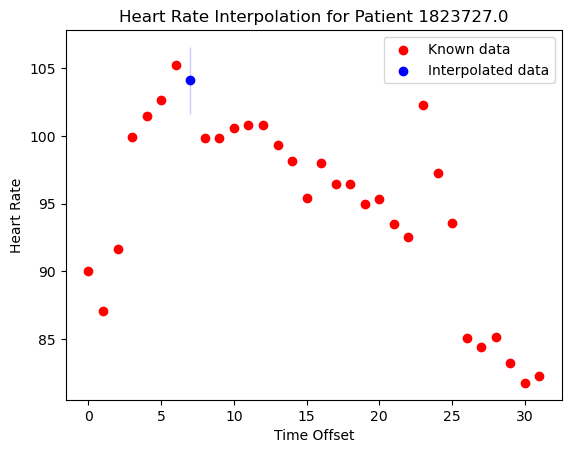

Finish 499th patient


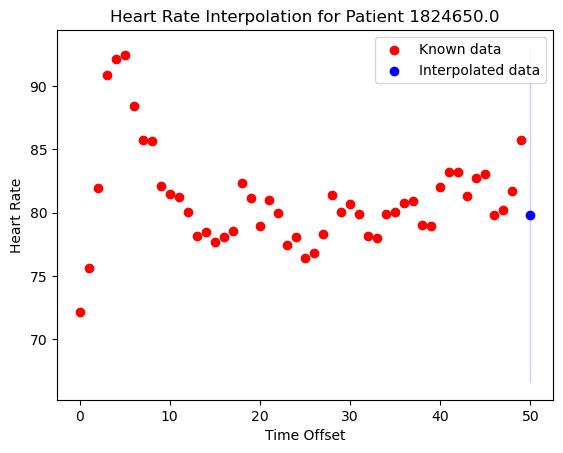

Finish 500th patient


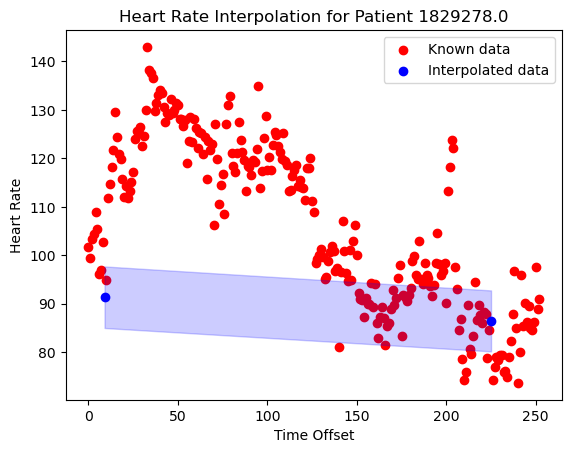

Finish 504th patient


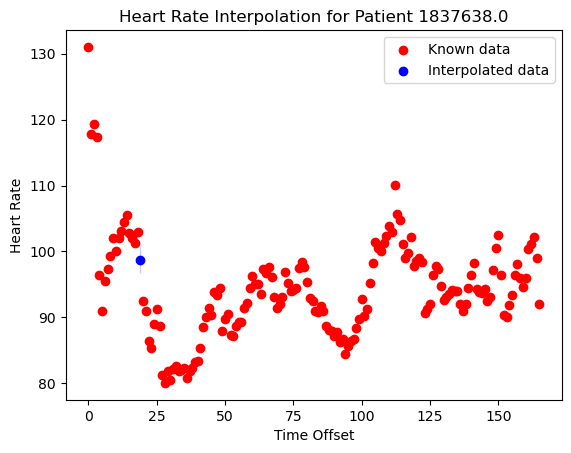

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 505th patient


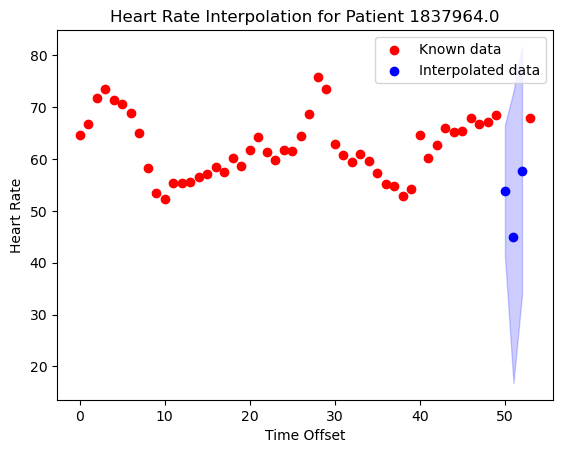

Finish 506th patient


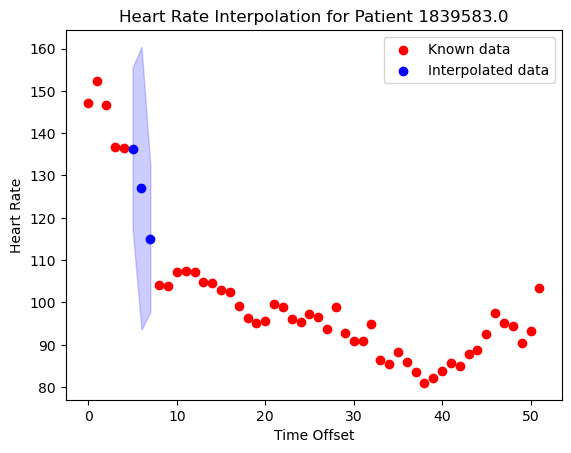

Finish 509th patient


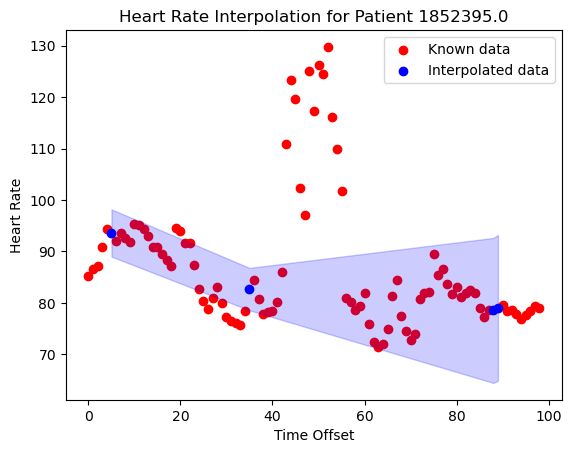

Finish 511th patient


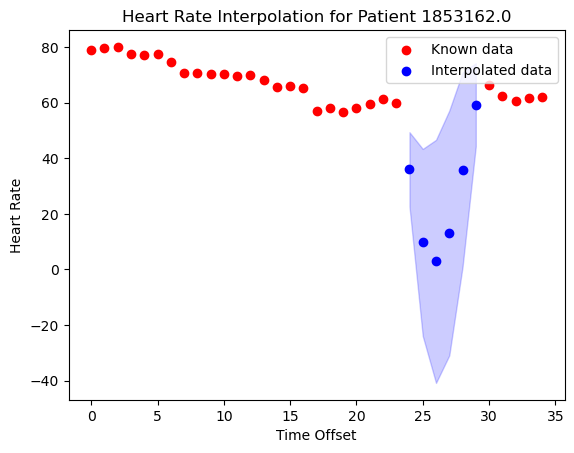

Finish 515th patient


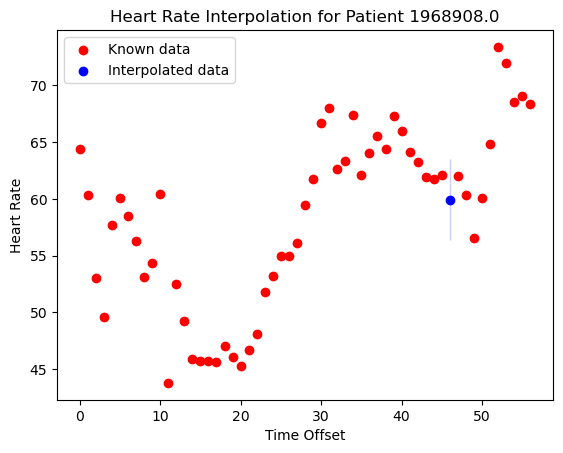

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 526th patient


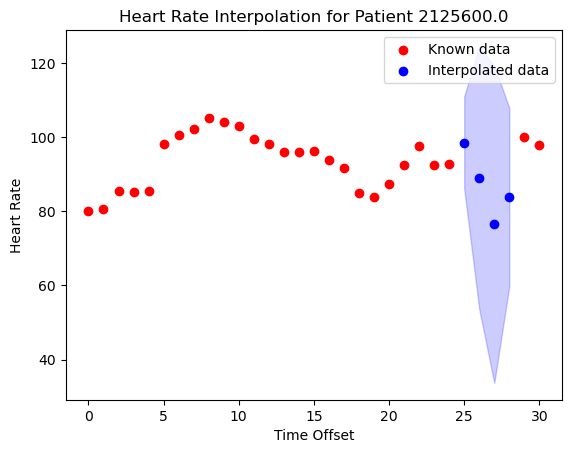

Finish 528th patient


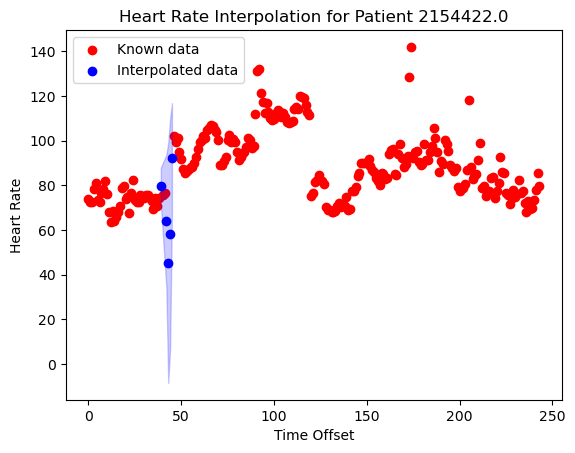

Finish 532th patient


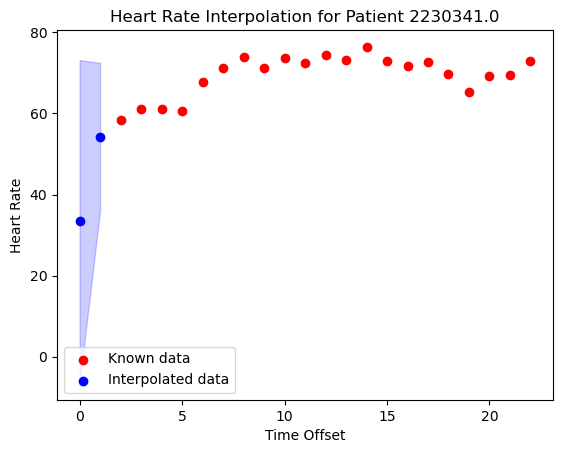

Finish 538th patient


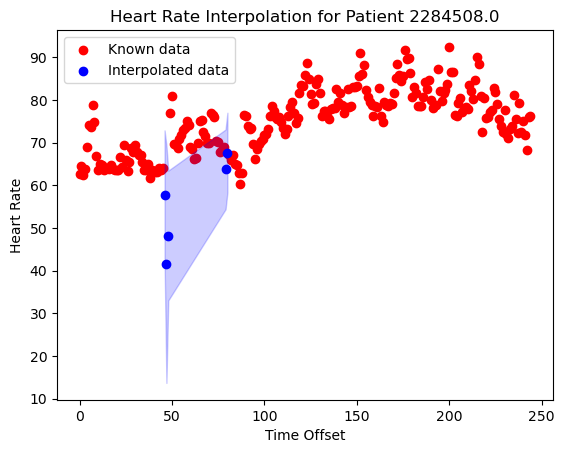

Finish 553th patient


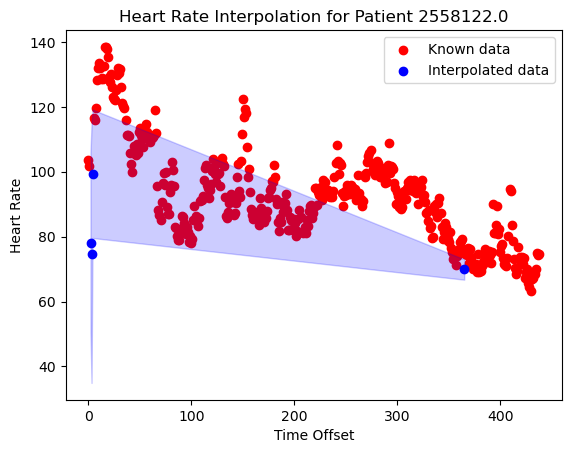

Finish 555th patient


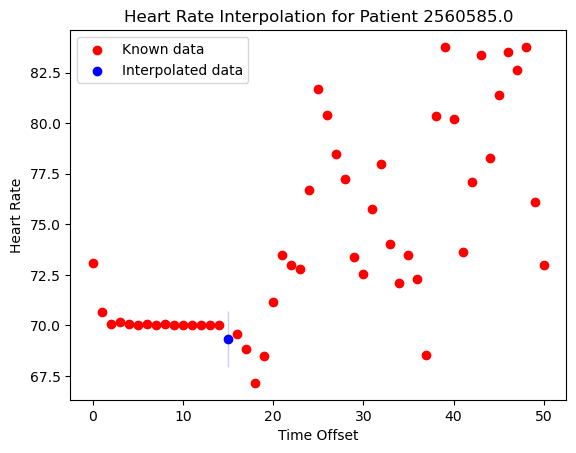

Finish 558th patient


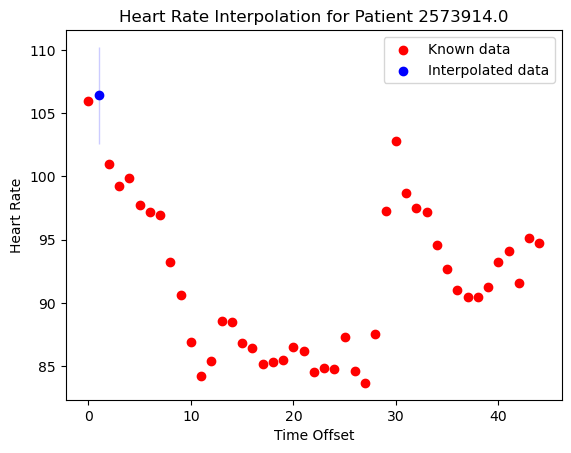

Finish 560th patient


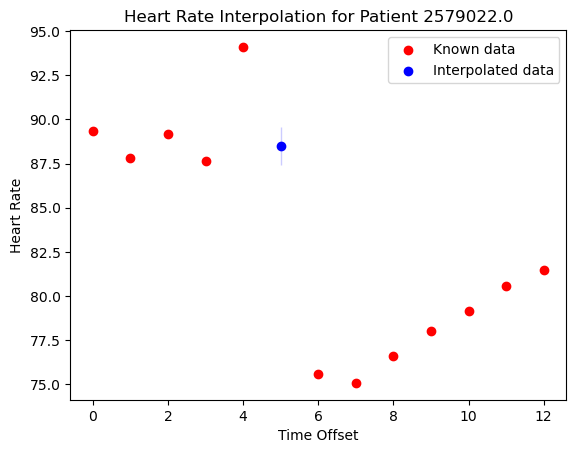

Finish 561th patient


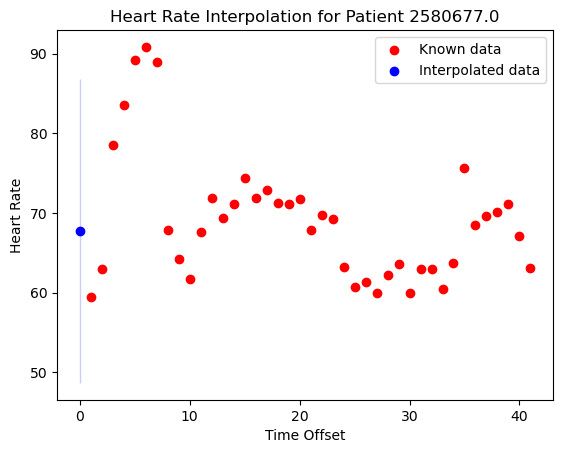

Finish 563th patient


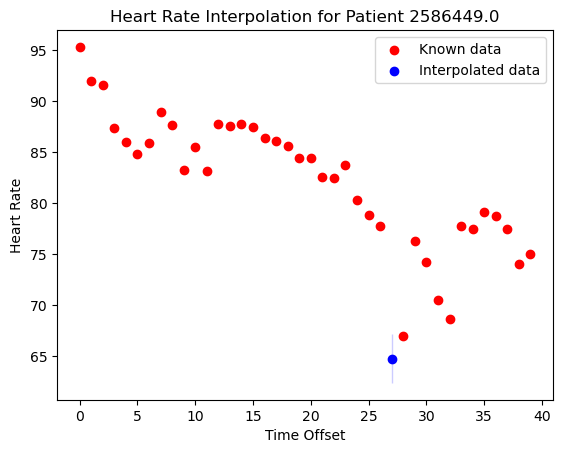

Finish 567th patient


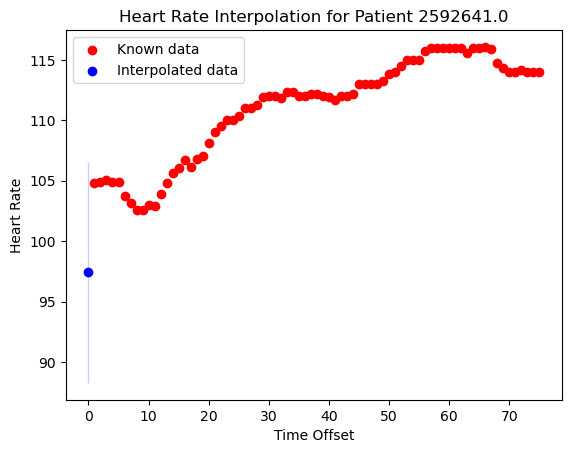

Finish 570th patient


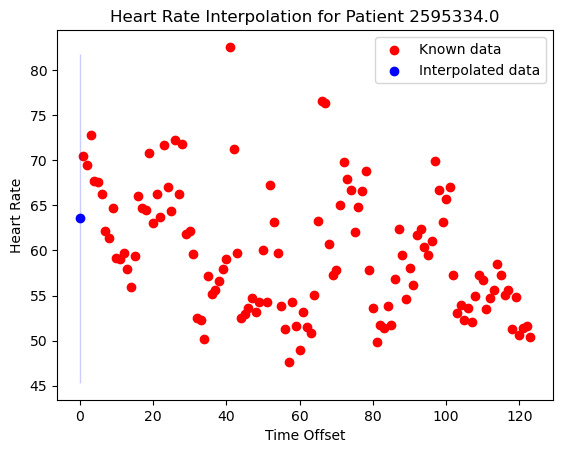

Finish 571th patient


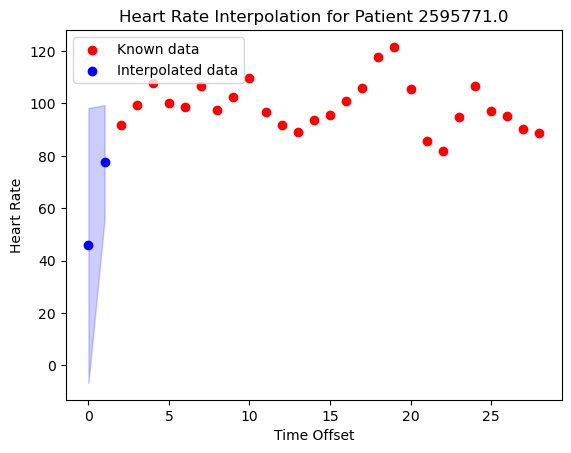

Finish 572th patient


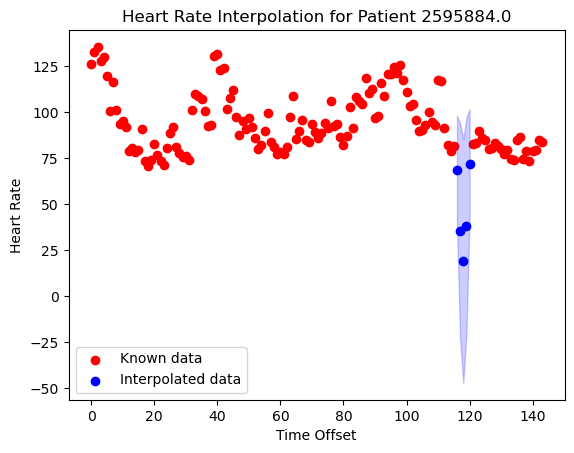

Finish 577th patient


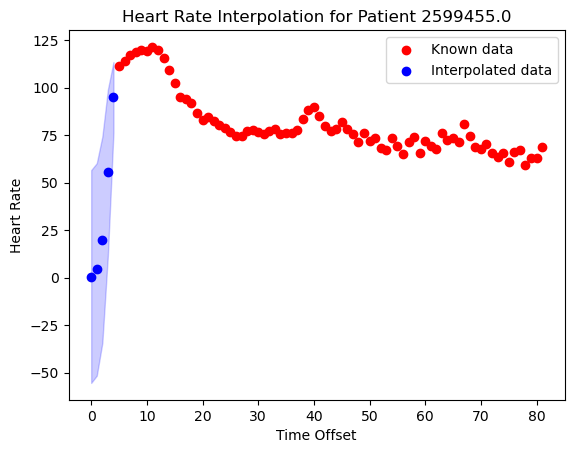

Finish 581th patient


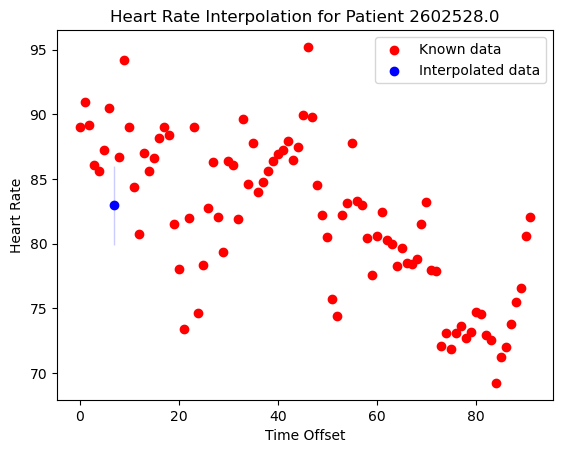

Finish 589th patient


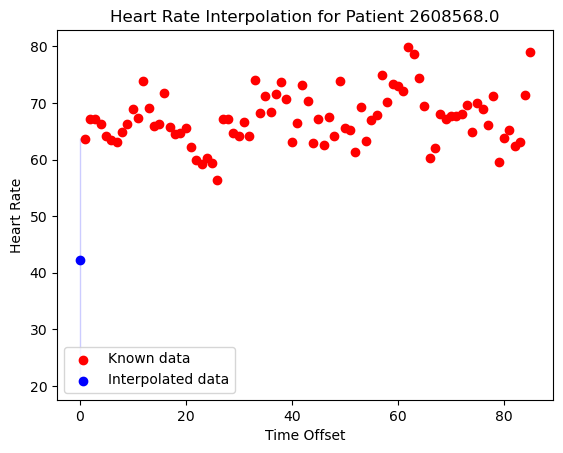

Finish 596th patient


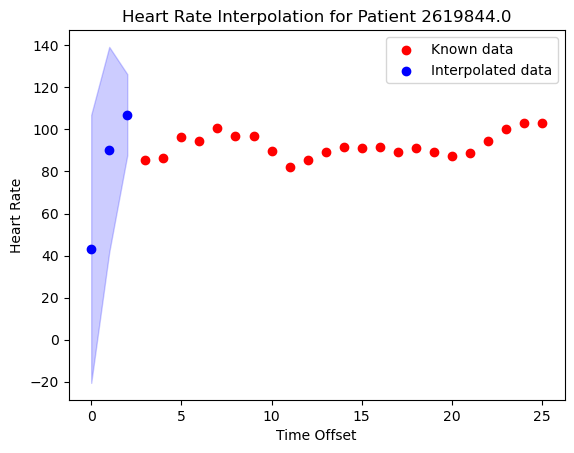

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 597th patient


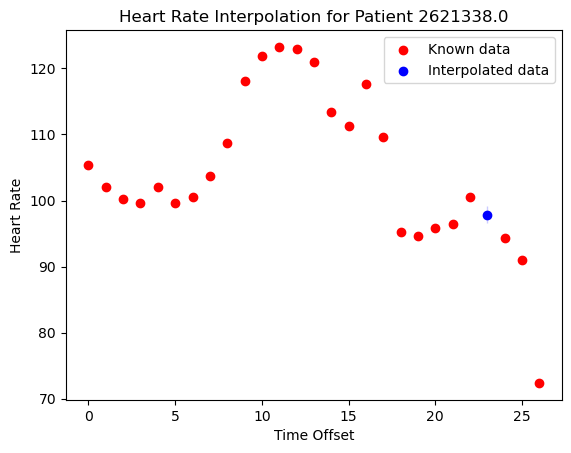

Finish 600th patient


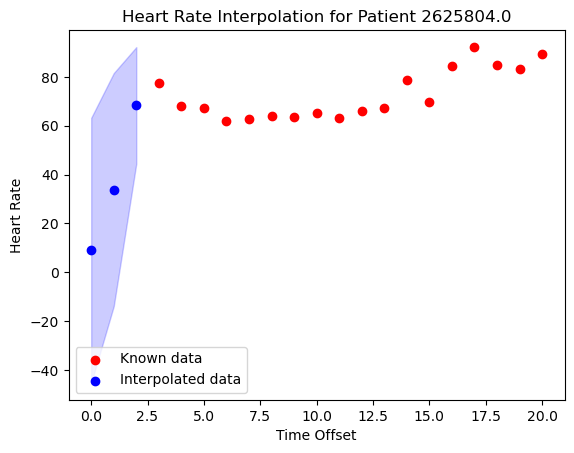

Finish 602th patient


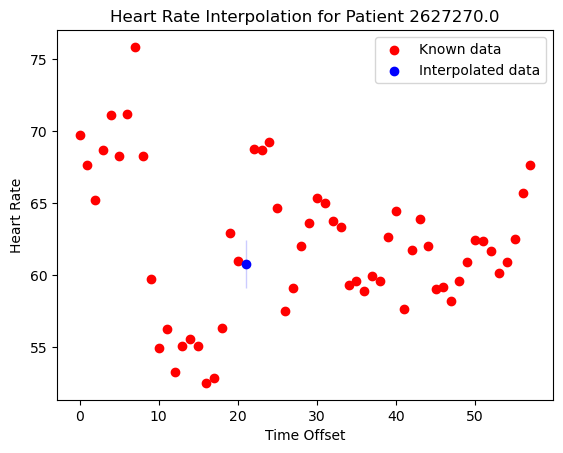

Finish 607th patient


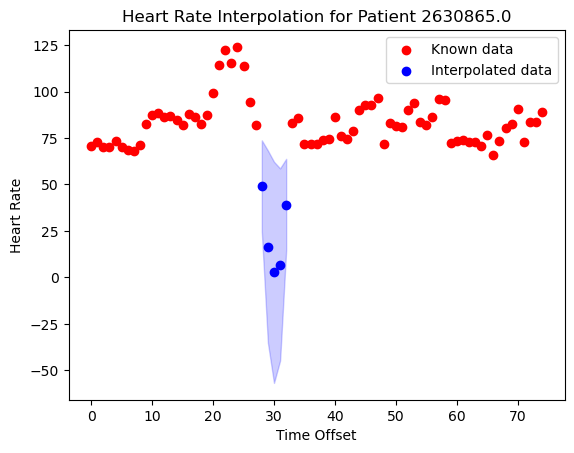

Finish 608th patient


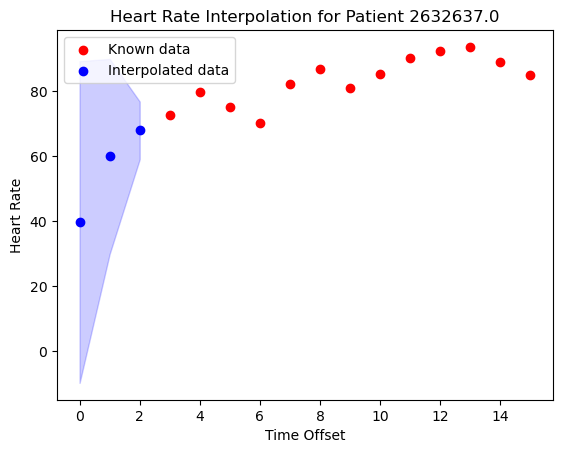

Finish 609th patient


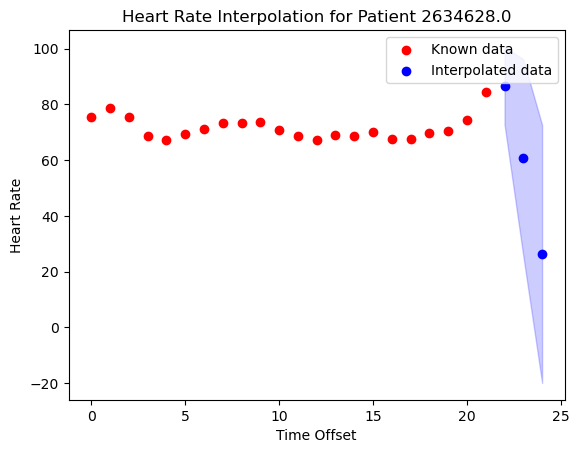

Finish 611th patient


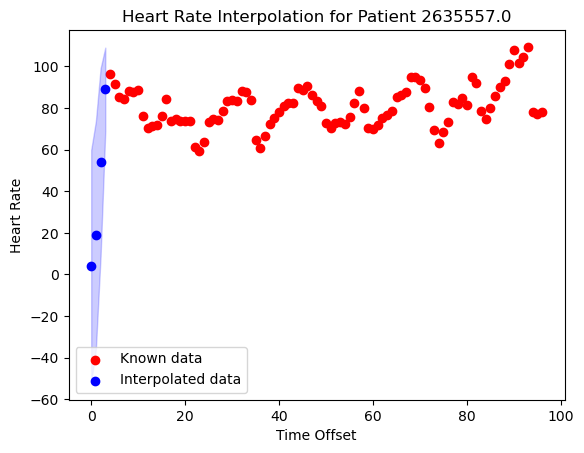

Finish 612th patient


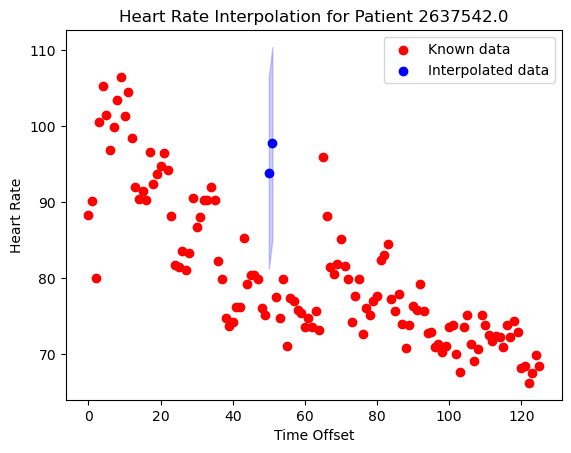

Finish 615th patient


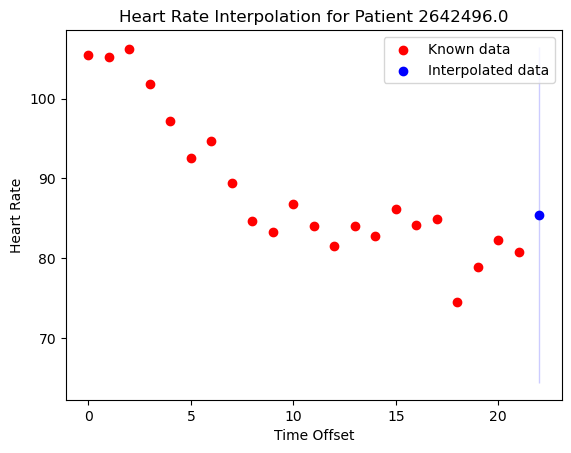

Finish 628th patient


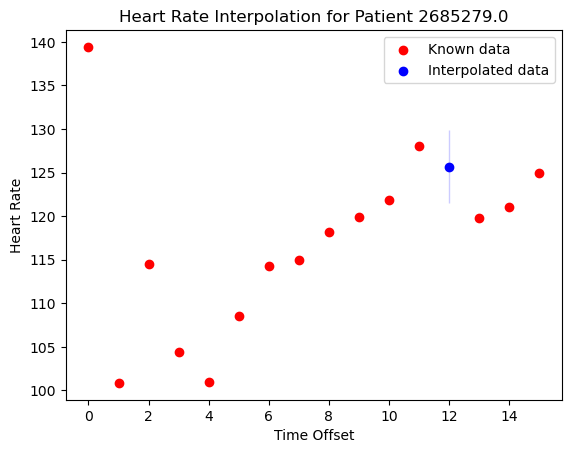

Finish 633th patient


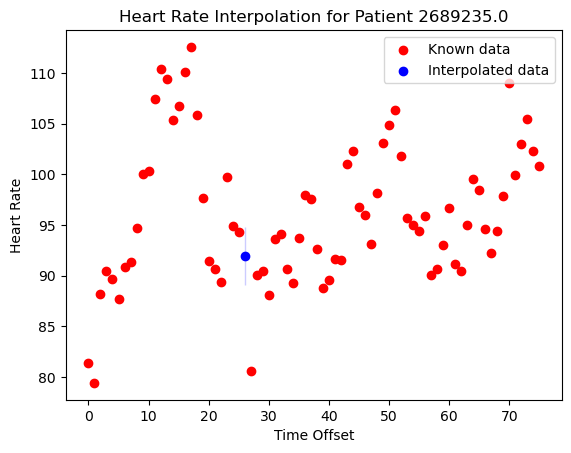

Finish 638th patient


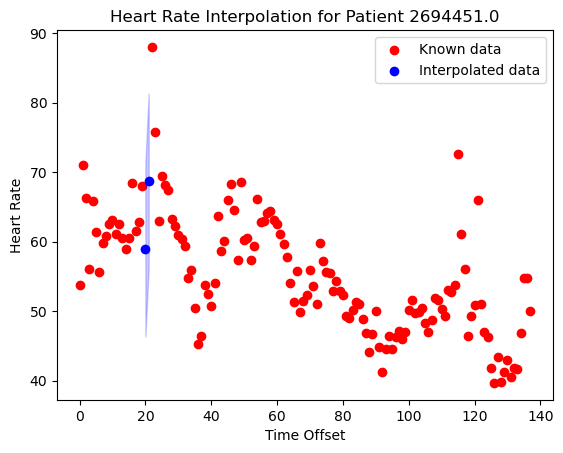

Finish 645th patient


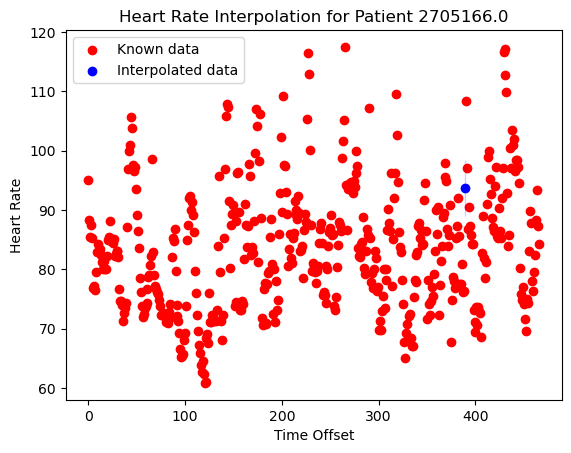

Finish 655th patient


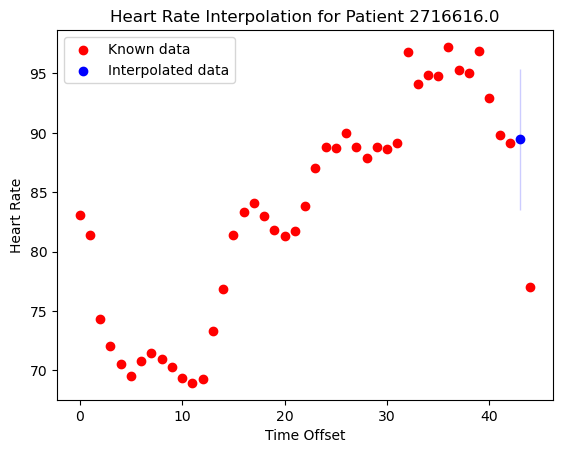

Finish 670th patient


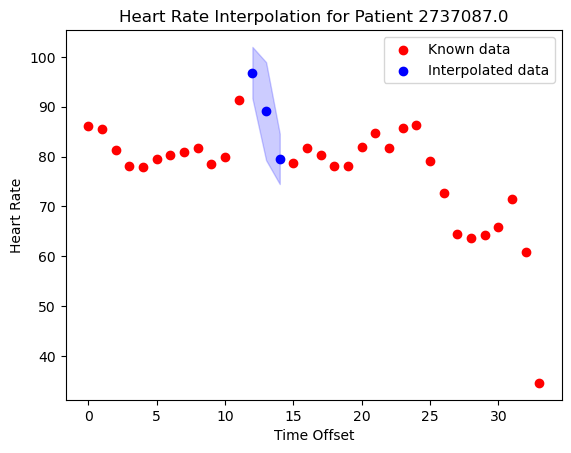

Finish 674th patient


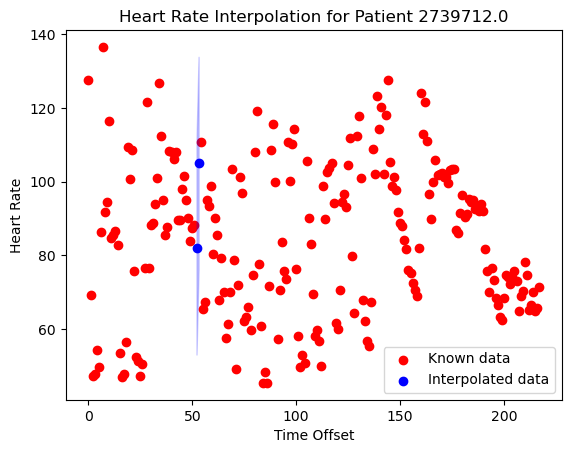

Finish 687th patient


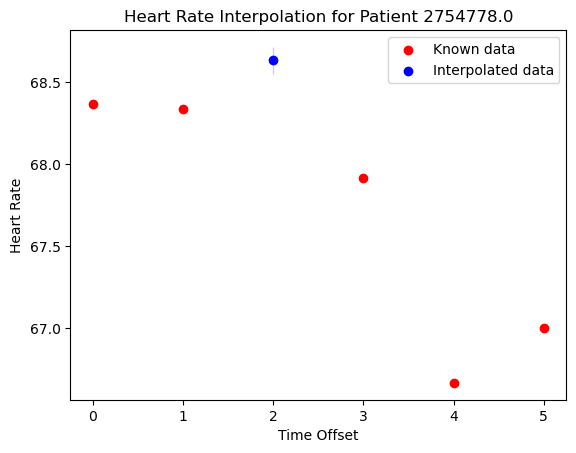

Finish 691th patient


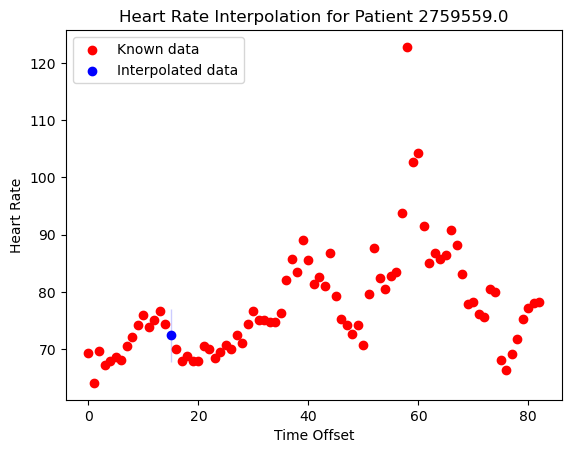

Finish 703th patient


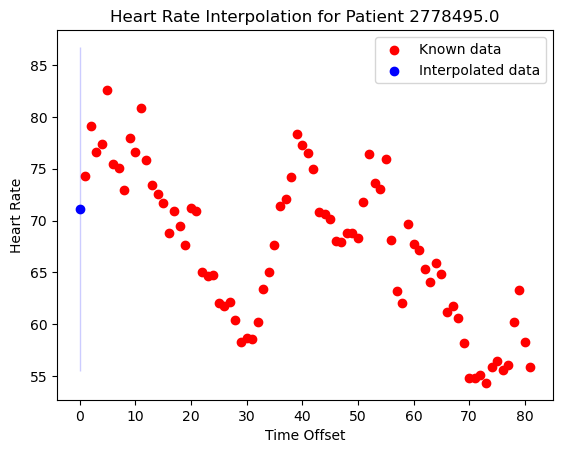

Finish 708th patient


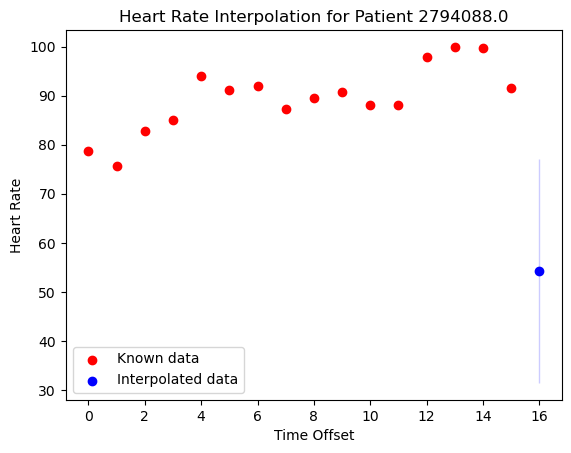

Finish 711th patient


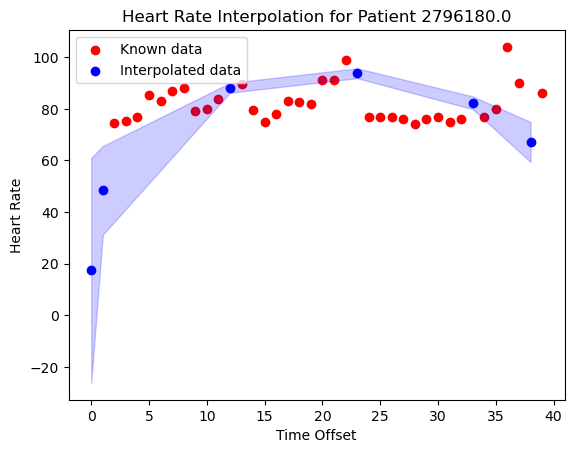

c:\Users\xiao-zy19\anaconda3\envs\bdd\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Finish 714th patient


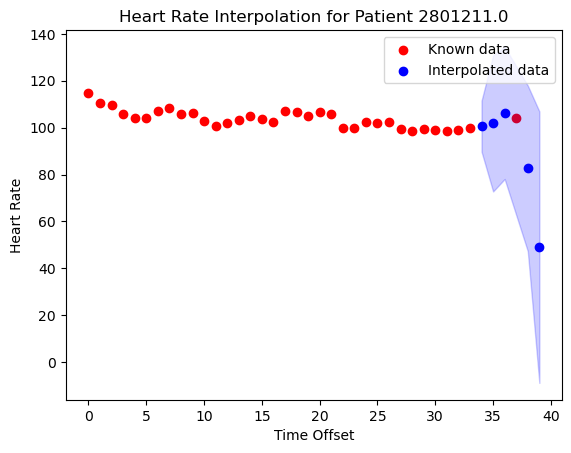

Finish 719th patient


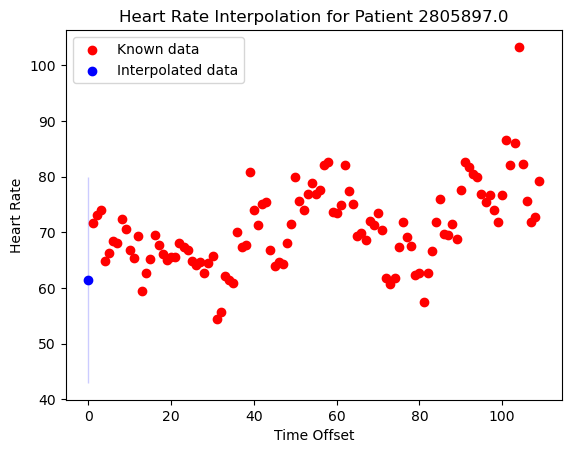

Finish 726th patient


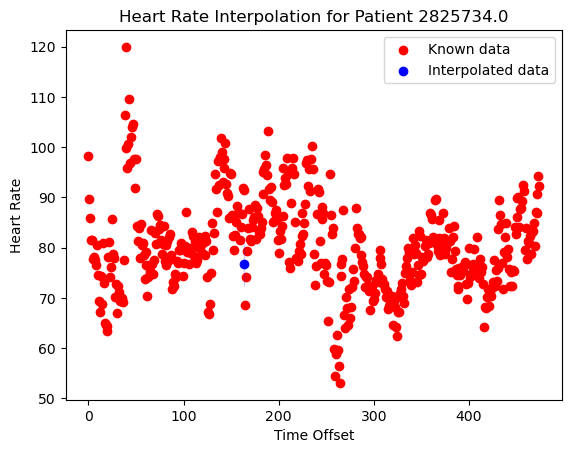

Finish 727th patient


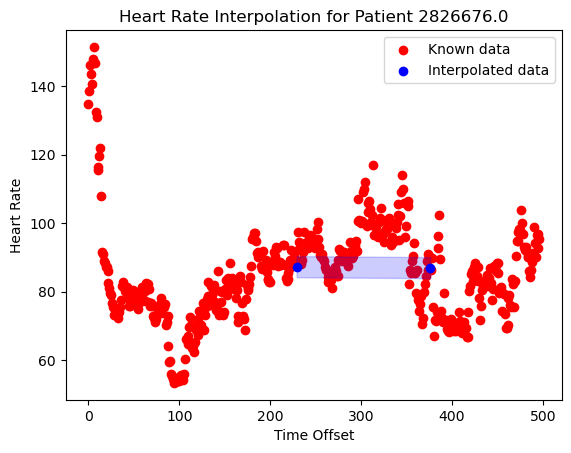

Finish 729th patient


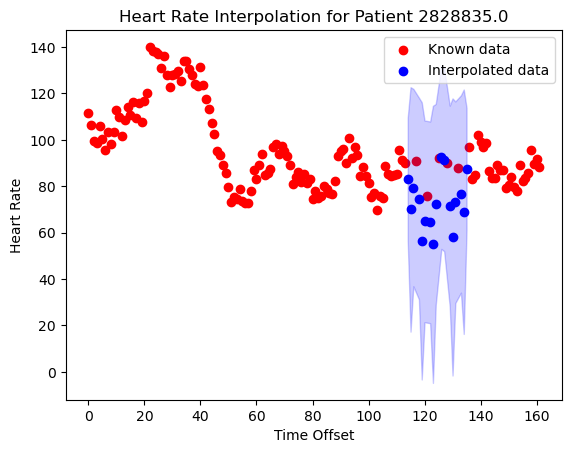

Finish 732th patient


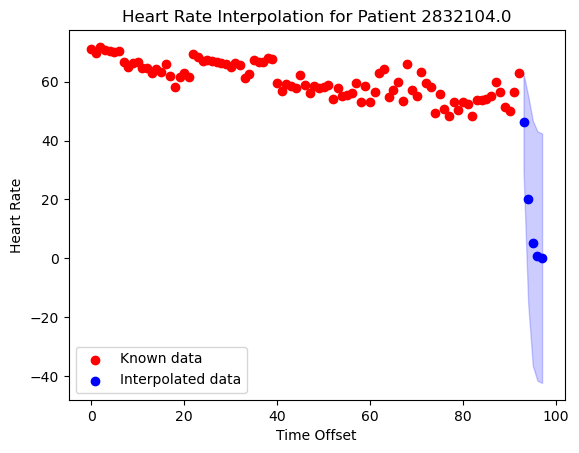

Finish 743th patient


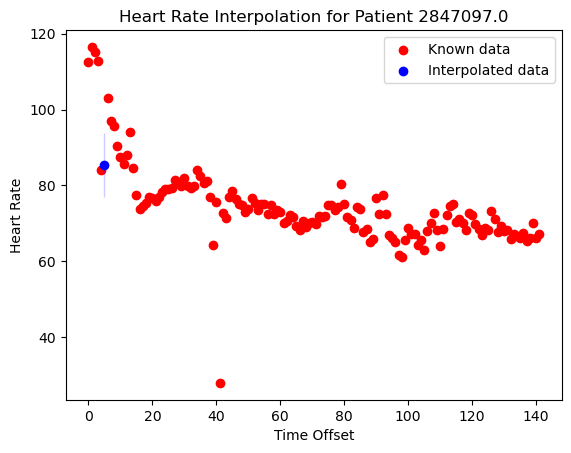

Finish 744th patient


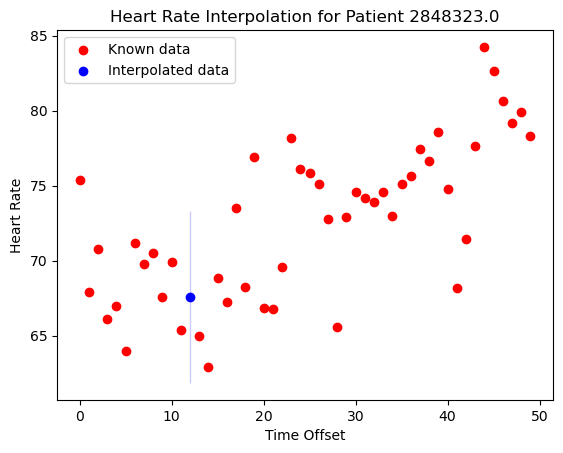

Finish 745th patient


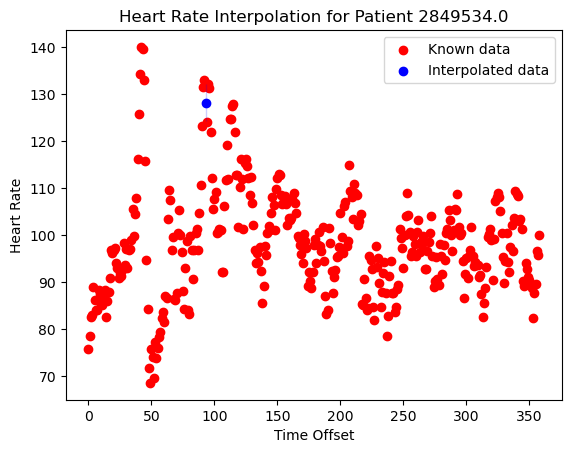

Finish 757th patient


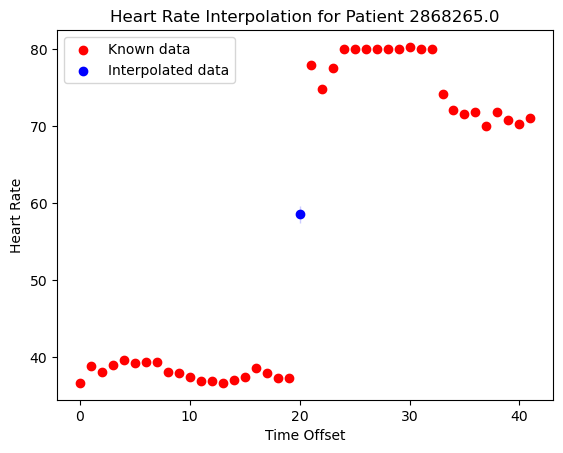

Finish 760th patient


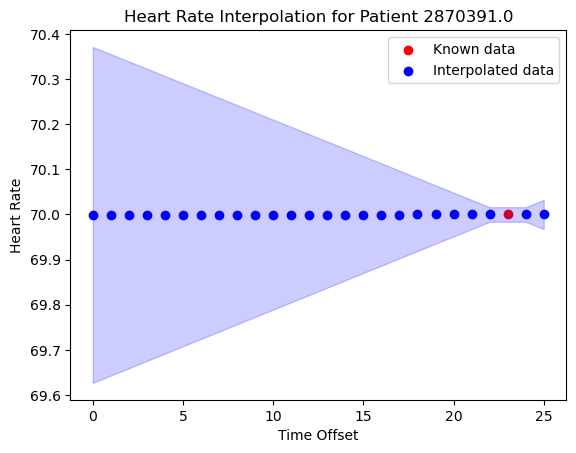

Finish 762th patient


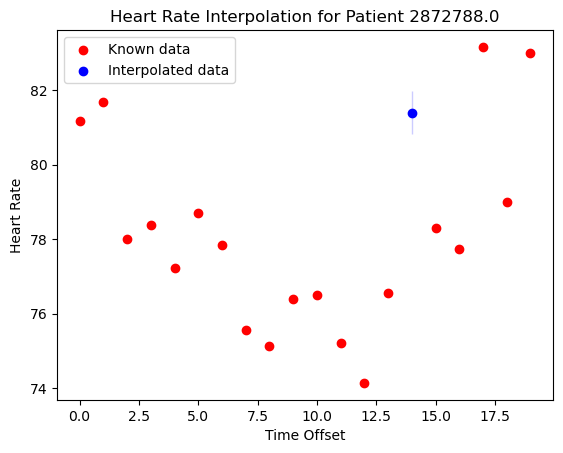

Finish 763th patient


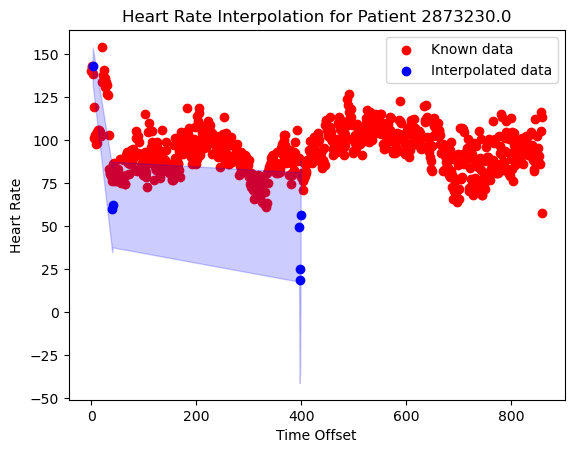

Finish 767th patient


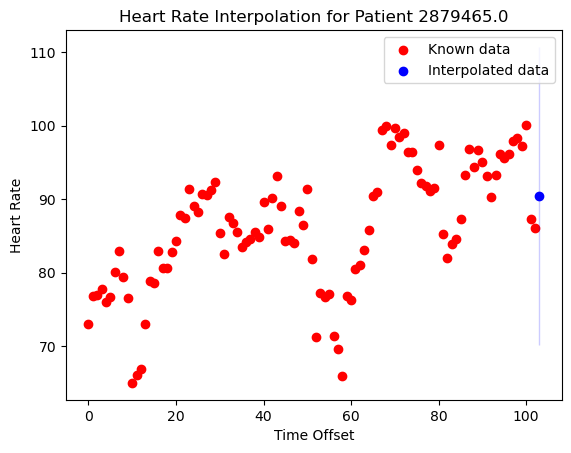

Finish 768th patient


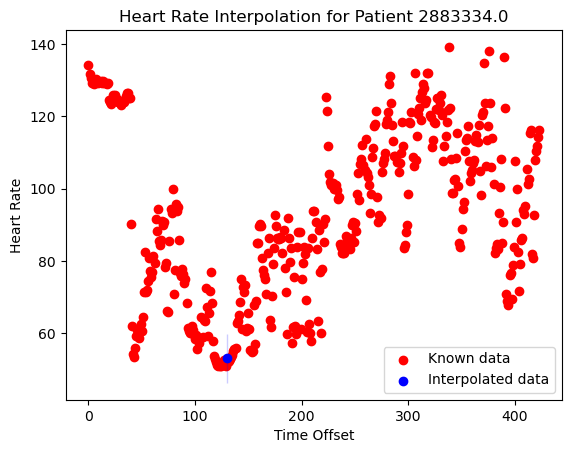

Finish 769th patient


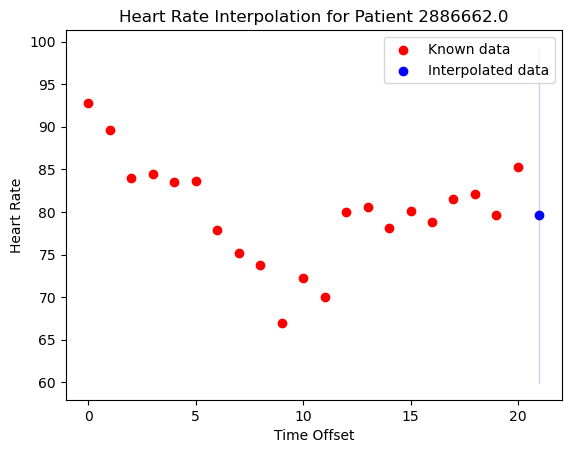

Finish 777th patient


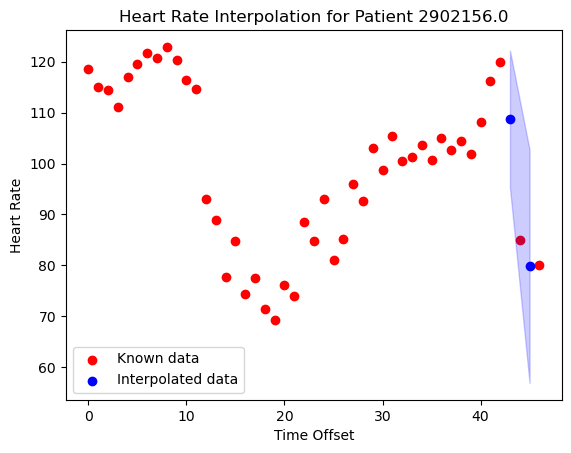

Finish 784th patient


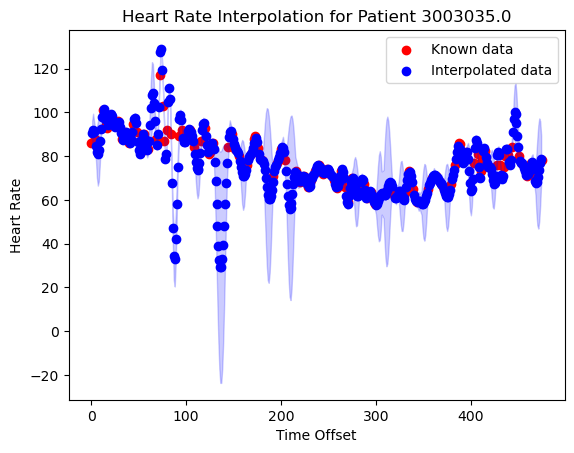

Finish 790th patient


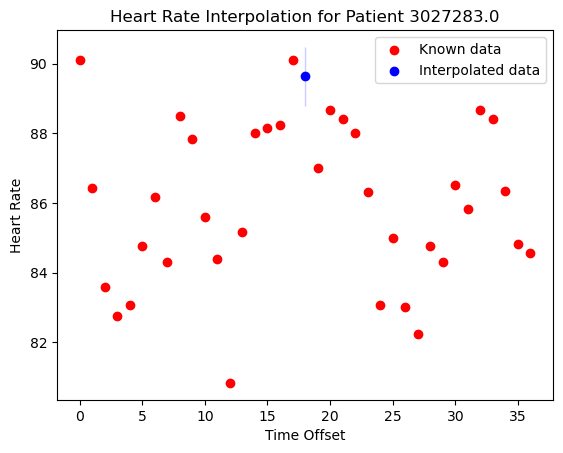

Finish 803th patient


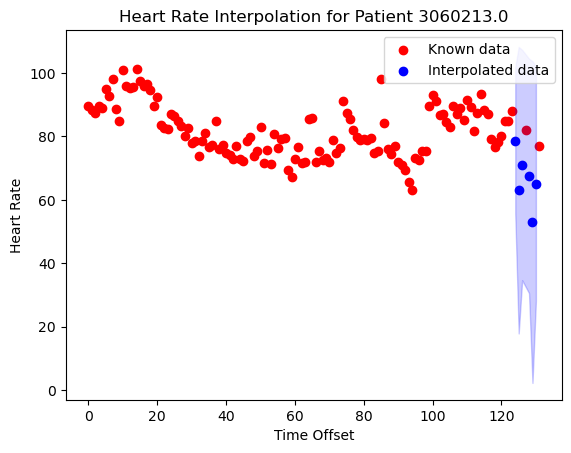

Finish 808th patient


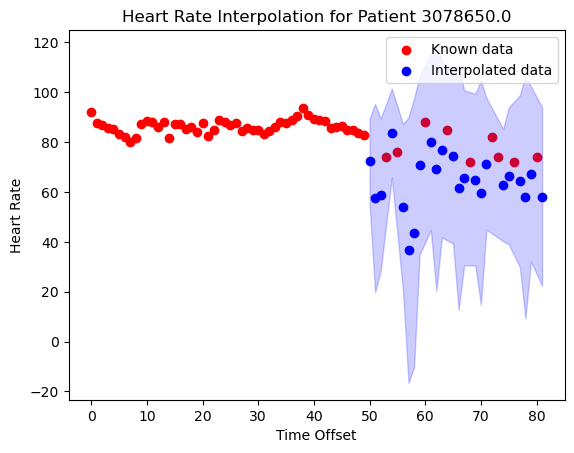

Finish 813th patient


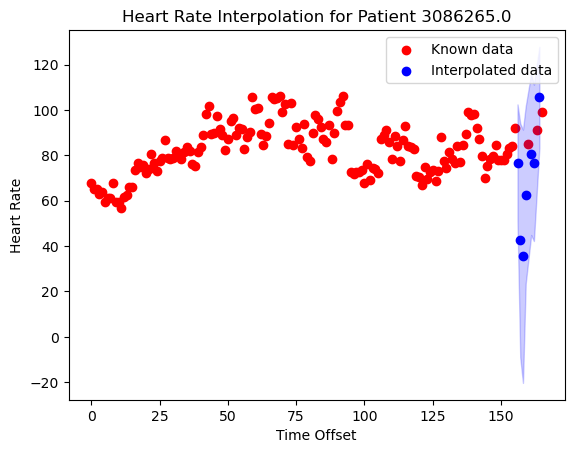

Finish 814th patient


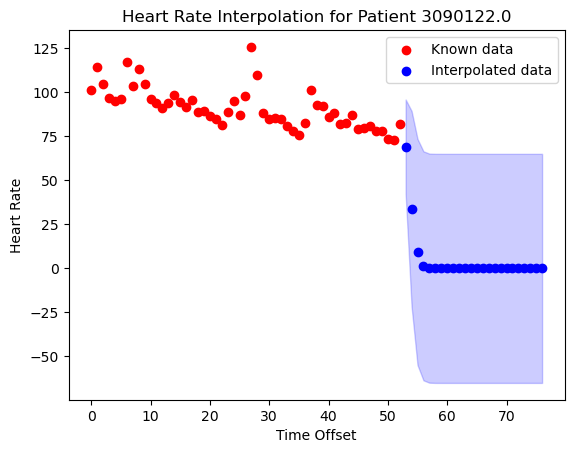

Finish 820th patient


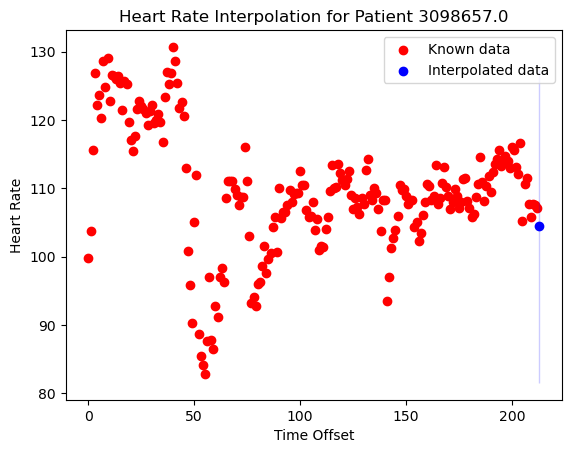

Finish 822th patient


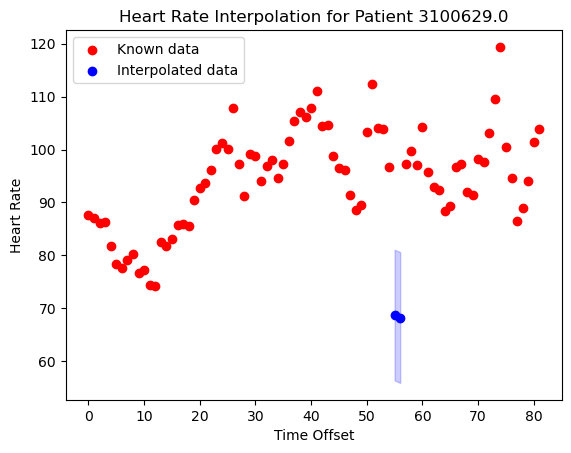

Finish 826th patient


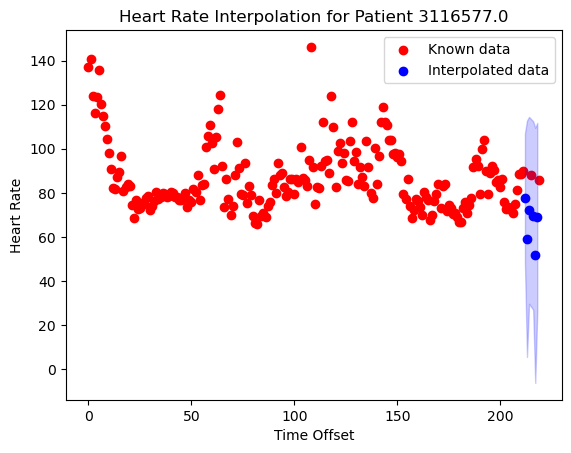

Finish 827th patient


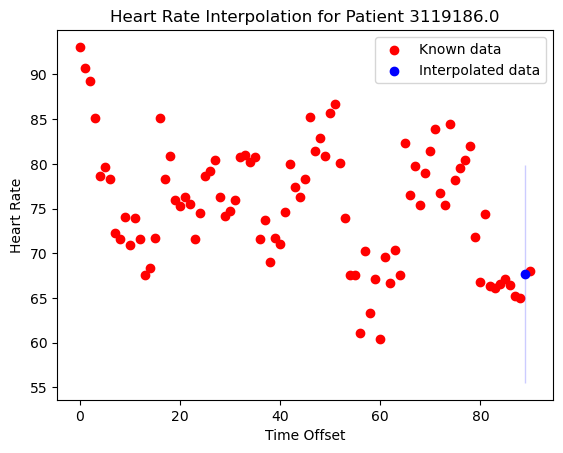

Finish 831th patient


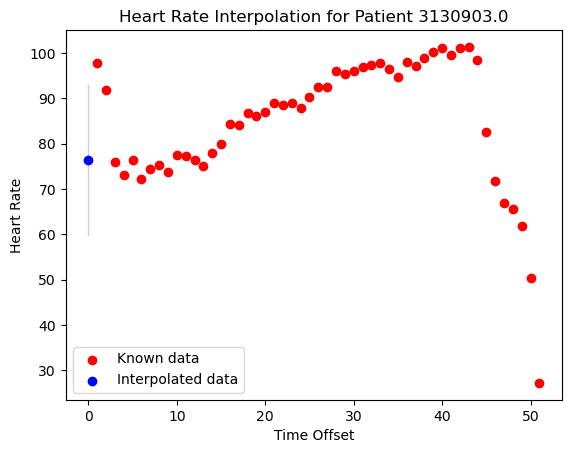

Finish 833th patient


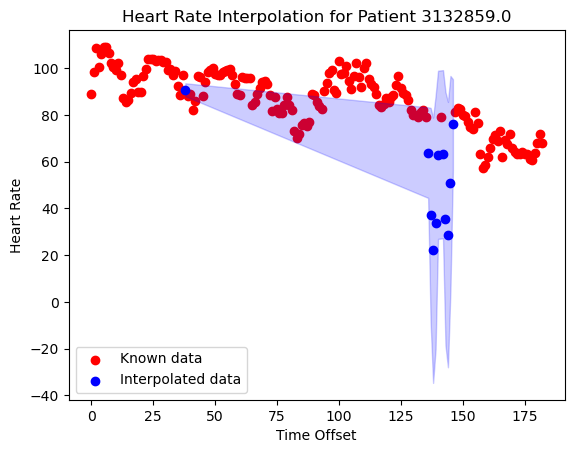

Finish 864th patient


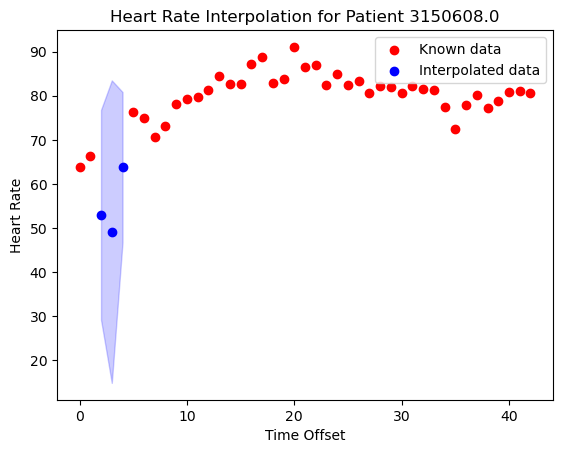

Finish 878th patient


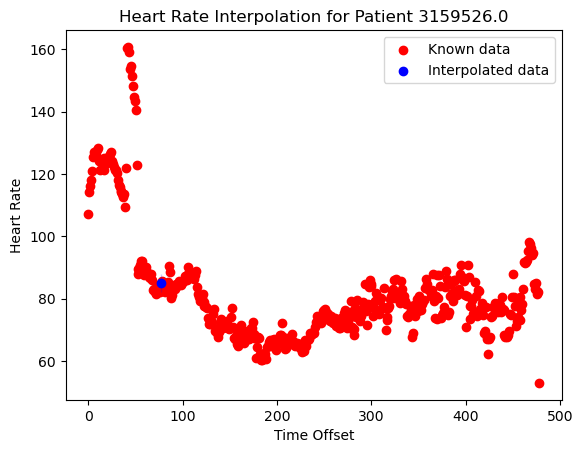

Finish 883th patient


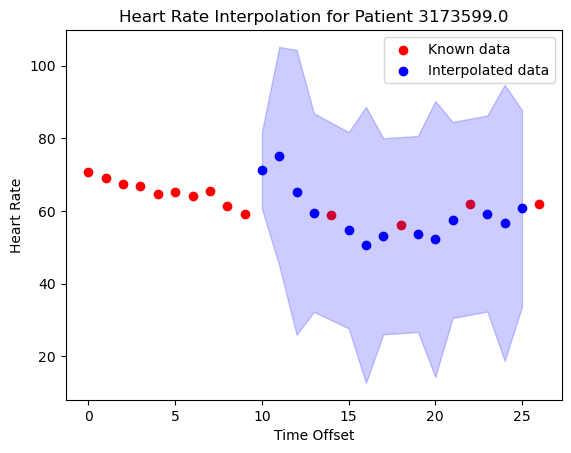

Finish 886th patient


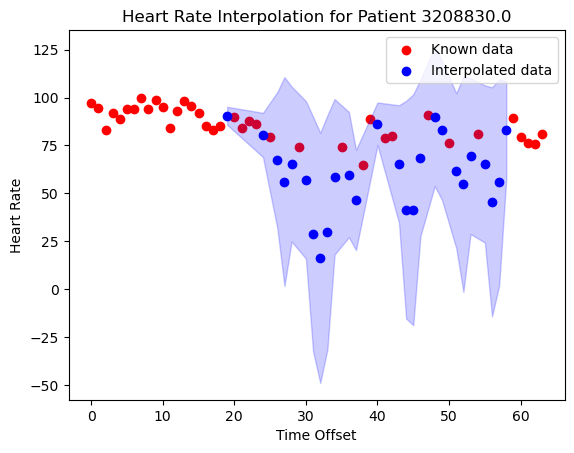

Finish 889th patient


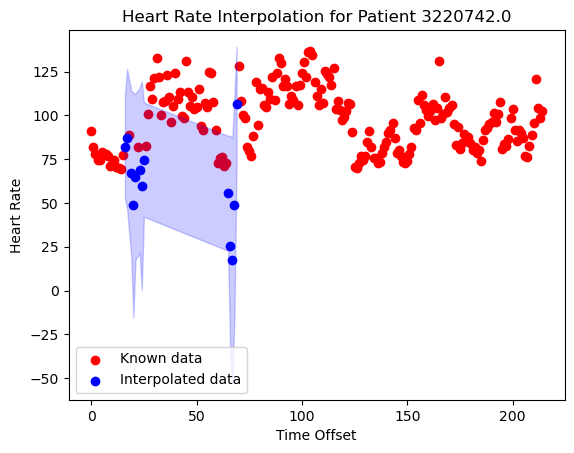

Finish 897th patient


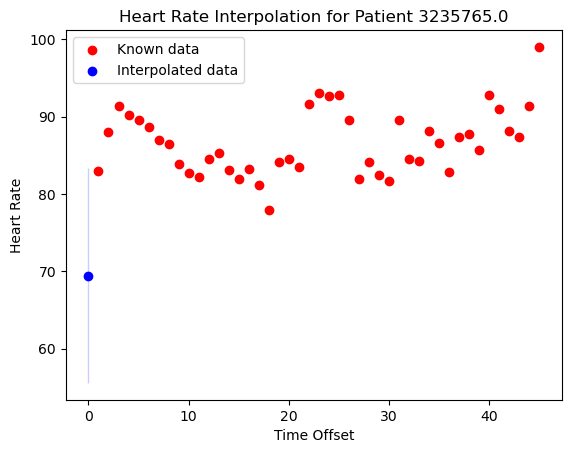

Finish 898th patient


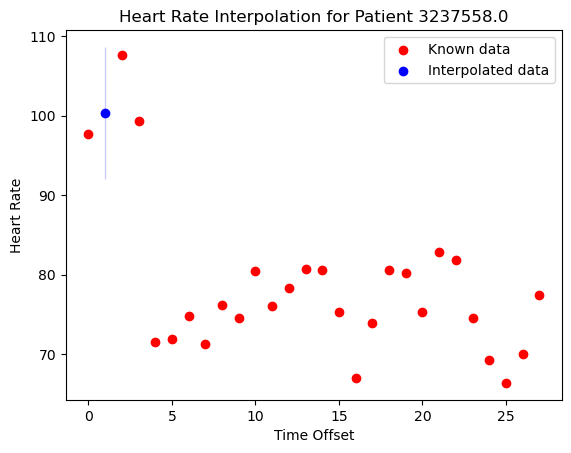

Finish 899th patient


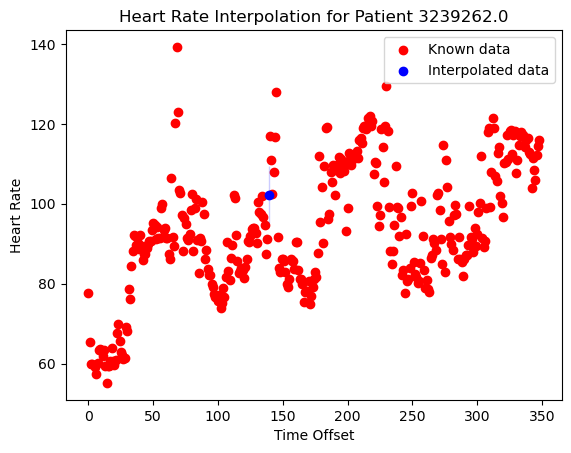

Finish 904th patient


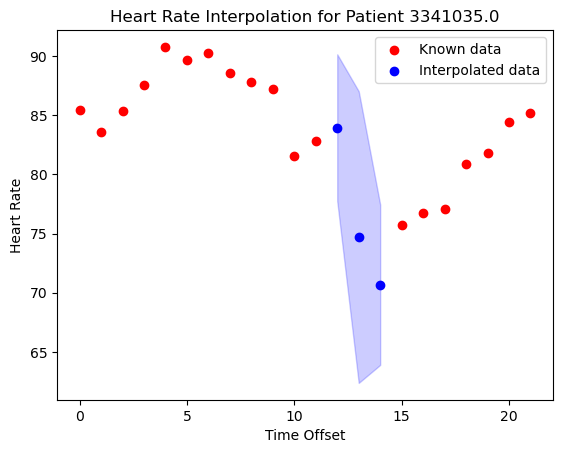

Finish 908th patient


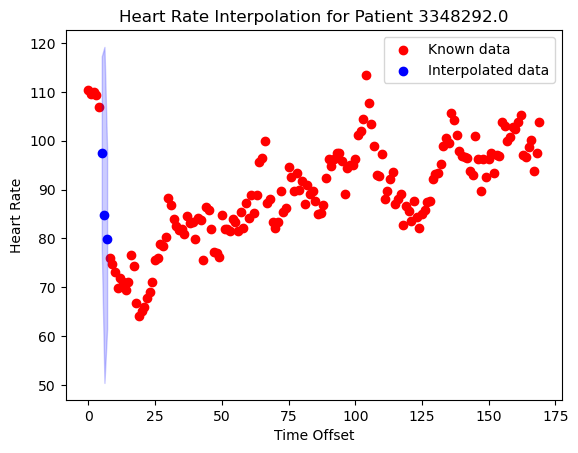

Finish 909th patient


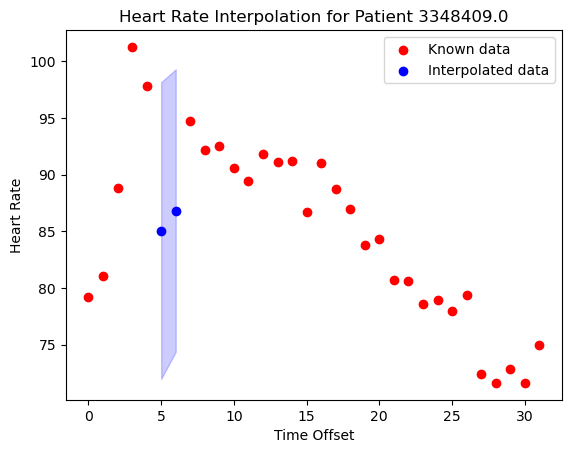

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

for i in range(len(HR_full_index)-1):
    if HR_full.iloc[HR_full_index[i]:HR_full_index[i+1]].isnull().values.any(): # test:  i < 10
        HR_data = HR_full.iloc[HR_full_index[i]:HR_full_index[i+1]][['observationoffset', 'heartrate']].to_numpy()
        HR_id = HR_full.iloc[HR_full_index[i]:HR_full_index[i+1]]['patientunitstayid'].unique()[0]
        # print(HR_id)
        # print(i)
        t = HR_data[:, 0]
        y = HR_data[:, 1]
        
        t_known = t[~np.isnan(y)]
        y_known = y[~np.isnan(y)]
        # print(t_known, y_known)
        
        # kernel
        kernel = C(1.0) * RBF(10)
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1000)
        gp.fit(t_known.reshape(-1, 1), y_known)
        t_missing = t[np.isnan(y)]
        # print(t_missing)

        y_pred, sigma = gp.predict(t_missing.reshape(-1, 1), return_std=True)
        inter_data = pd.DataFrame({'patientunitstayid': HR_id, 'observationoffset': t_missing, 'heartrate': y_pred})
        
        for idx, row in inter_data.iterrows():
            mask = (HR_full['patientunitstayid'] == row['patientunitstayid']) & (HR_full['observationoffset'] == row['observationoffset']) & HR_full['heartrate'].isnull()
            HR_full.loc[mask, 'heartrate'] = row['heartrate']
        
        print(f'Finish {i}th patient')
        
    # 绘制原始数据点
        plt.scatter(t_known, y_known, color='red', label='Known data')

        # 绘制插值数据
        plt.scatter(t_missing, y_pred, color='blue', label='Interpolated data')

        # 可选：绘制不确定性区间
        plt.fill_between(t_missing, y_pred - sigma, y_pred + sigma, alpha=0.2, color='blue')

        plt.title(f'Heart Rate Interpolation for Patient {HR_id}')
        plt.xlabel('Time Offset')
        plt.ylabel('Heart Rate')
        plt.legend()
        plt.show()
        # print(HR_full.iloc[HR_full_index[i]:HR_full_index[i+1]])

In [8]:
print(f'GaussianProcess finished!')
print(HR_full)

GaussianProcess finished!
       patientunitstayid  observationoffset  heartrate
0               143870.0                  0  41.562500
1               143870.0                  1  41.428571
2               143870.0                  2  43.307692
3               143870.0                  3  44.923077
4               143870.0                  4  47.846154
...                  ...                ...        ...
65214          3352231.0                  9  72.307692
65215          3352231.0                 10  62.538462
65216          3352231.0                 11  58.071429
65217          3352231.0                 12  57.285714
65218          3352231.0                 13  67.272727

[65219 rows x 3 columns]
